In [1]:
import os
import time
import itertools
import pandas as pd
import numpy as np
import scikit_posthocs as sp
import pingouin as pg
import seaborn as sns
# import gtfparse as gp
# import gzip
# import itertools
# import subprocess
# from multiprocessing import Pool

# import warnings
from scipy.stats import chi2_contingency, fisher_exact, f_oneway, tukey_hsd, kruskal, dunnett


In [2]:
import sys
sys.path.append('/mnt/d/GoTx_Folder/src')
# from a2ihelper import call_reditools, 
import a2ihelper as a2i

# Valeri data

## First step is get genes posisiotns to run reditools
it can be done with the function get_genes_positions()

In [3]:
genes = ['Clec1a','Clec2g','Clec4a4','Clec4e','Csf3r','Cyp4f16','Dscam',
         'Gm8774','H2bc27','Hap1','Hdc','Hebp1','Ier2','Igkv6-23','Kdm6b',
         'Klri1','Marchf3','Mthfs','Ncr1','Notch1','Per1','Ptchd1','Rnf144a',
         'Sgms2','Stra6l','Xylt1','I830077J02Rik','Tlr1','Axl','C1qc','Cebpb',
         'Il1b','Nfkbiz','B2m','Apol10a','Cd74','Ndnf','Pcp4','Pvalb']

path_ref_annotation='/mnt/e/reference_files/gencode.vM10.annotation.gtf'
bams_path = '/mnt/d/rna_editing/bams/'

In [4]:
# genes = ['Clec1a','Clec2g','Clec4a4','Clec4e']
# genes_positions_list = []
# gens_aux = []
# gzip_file = False
# get_gene = False
# chr = ''
# start_gene = ''
# end_gene = ''

#     if genes:
#         if gzip_file:
#             # for g in genes:
#             with gzip.open(path_ref_annotation,'r') as f_gtf:
#                 for line in f_gtf:
#                     if not line.startswith('#'.encode()):
#                         l = line.decode().split('\t')
#                         dict_g = { i.split(' ')[0]:i.split(' ')[1] for i in [j.strip() for j in l[-1].replace(';\n','').replace('"','').split(';')] }
#                         if (l[2]=='gene') and (dict_g['gene_name'] in genes):
#                             chr = l[0]
#                             start_gene = l[3]
#                             end_gene = l[4]
#                             get_gene = True                        
#                             # gens_aux.append( dict_g['gene_name'] )
#                         elif (get_gene) and (l[2]=='start_codon'):
#                             start_codon = l[3]
#                             gens_aux.append( dict_g['gene_name']+'_5UTR' )
#                             if start_gene != start_codon:
#                                 genes_positions_list.append(chr+':'+start_gene+'-'+str(int(start_codon)-1))
#                             else:
#                                 genes_positions_list.append(chr+':'+start_gene+'-'+start_codon)
#                         elif (get_gene) and (l[2]=='stop_codon'):
#                             stop_codon = l[4]
#                             gens_aux.append( dict_g['gene_name']+'_3UTR' )
#                             if end_gene != stop_codon:
#                                 genes_positions_list.append(chr+':'+str(int(stop_codon)+1)+'-'+end_gene)
#                             else:
#                                 genes_positions_list.append(chr+':'+stop_codon+'-'+end_gene)
#                             get_gene = False #control for get start and stop codon after gotten gene
#         else:
#             # for g in genes:
#             with open(path_ref_annotation,'r') as f_gtf:
#                 for line in f_gtf:
#                     if not line.startswith('#'):
#                         l = line.split('\t')
#                         dict_g = { i.split(' ')[0]:i.split(' ')[1] for i in [j.strip() for j in l[-1].replace(';\n','').replace('"','').split(';')] }                    
#                         if (l[2]=='gene') and (dict_g['gene_name'] in genes):
#                             chr = l[0]
#                             start_gene = l[3]
#                             end_gene = l[4]
#                             get_gene = True                        
#                             # gens_aux.append( dict_g['gene_name'] )
#                         elif (get_gene) and (l[2]=='start_codon'):
#                             start_codon = l[3]
#                             gens_aux.append( dict_g['gene_name']+'_5UTR' )
#                             if start_gene != start_codon:
#                                 genes_positions_list.append(chr+':'+start_gene+'-'+str(int(start_codon)-1))
#                             else:
#                                 genes_positions_list.append(chr+':'+start_gene+'-'+start_codon)
#                         elif (get_gene) and (l[2]=='stop_codon'):
#                             stop_codon = l[4]
#                             gens_aux.append( dict_g['gene_name']+'_3UTR' )
#                             if end_gene != stop_codon:
#                                 genes_positions_list.append(chr+':'+str(int(stop_codon)+1)+'-'+end_gene)
#                             else:
#                                 genes_positions_list.append(chr+':'+stop_codon+'-'+end_gene)
#                             get_gene = False #control for get start and stop codon after gotten gene

In [4]:
# t1 = time.time()
# gene_coord = a2i.call_reditools2.get_genes_positions(genes, path_ref_annotation, gzip_file=False)
# gene_coord
# print(np.round( (time.time()-t1), 6 ), np.round( (time.time()-t1)/60, 2 ))

In [5]:
# t1 = time.time()
# utr_gene_coord = a2i.call_reditools2.get_utr_genes_positions(genes, path_ref_annotation, gzip_file=False)
# utr_gene_coord
# print(np.round( (time.time()-t1), 6 ), np.round( (time.time()-t1)/60, 2 ))

15.894659 0.26


In [7]:
utr_gene_coord = {'Notch1_5UTR': 'chr2:26457903-26503555',
 'Notch1_3UTR': 'chr2:26459534-26516663',
 'B2m_5UTR': 'chr2:122147686-122147737',
 'B2m_3UTR': 'chr2:122151661-122153083',
 'Hdc_5UTR': 'chr2:126593667-126618566',
 'Hdc_3UTR': 'chr2:126593964-126619299',
 'Il1b_5UTR': 'chr2:129364570-129370327',
 'Il1b_3UTR': 'chr2:129365032-129371139',
 'Cebpb_5UTR': 'chr2:167688915-167689021',
 'Cebpb_3UTR': 'chr2:167689913-167690418',
 'I830077J02Rik_5UTR': 'chr3:105924358-105928767',
 'I830077J02Rik_3UTR': 'chr3:105926443-105932664',
 'Sgms2_5UTR': 'chr3:131318985-131342220',
 'Sgms2_3UTR': 'chr3:131323110-131491411',
 'Stra6l_5UTR': 'chr4:45848664-45849077',
 'Stra6l_3UTR': 'chr4:45885400-45887008',
 'Csf3r_5UTR': 'chr4:126024550-126027336',
 'Csf3r_3UTR': 'chr4:126043839-126044440',
 'C1qc_5UTR': 'chr4:136889804-136892559',
 'C1qc_3UTR': 'chr4:136890046-136893065',
 'Tlr1_5UTR': 'chr5:64924679-64927229',
 'Tlr1_3UTR': 'chr5:64924848-64933563',
 'Ndnf_5UTR': 'chr6:65671590-65696039',
 'Ndnf_3UTR': 'chr6:65704446-65712326',
 'Igkv6-23_5UTR': 'chr6:70260409-70260930',
 'Igkv8-21_5UTR': 'chr6:70260409-70315449',
 'Igkv6-20_5UTR': 'chr6:70260409-70336476',
 'Igkv8-19_5UTR': 'chr6:70260409-70341445',
 'Igkv8-18_5UTR': 'chr6:70260409-70355876',
 'Igkv6-17_5UTR': 'chr6:70260409-70371468',
 'Igkv8-16_5UTR': 'chr6:70260409-70387235',
 'Igkv6-15_5UTR': 'chr6:70260409-70406989',
 'Igkv6-14_5UTR': 'chr6:70260409-70435473',
 'Igkv6-13_5UTR': 'chr6:70260409-70458033',
 'Igkv3-12_5UTR': 'chr6:70260409-70518249',
 'Igkv3-10_5UTR': 'chr6:70260409-70572632',
 'Igkv3-9_5UTR': 'chr6:70260409-70588188',
 'Igkv3-7_5UTR': 'chr6:70260409-70607436',
 'Igkv3-5_5UTR': 'chr6:70260409-70663297',
 'Igkv3-4_5UTR': 'chr6:70260409-70671788',
 'Igkv3-3_5UTR': 'chr6:70260409-70686945',
 'Igkv3-2_5UTR': 'chr6:70260409-70698467',
 'Igkv3-1_5UTR': 'chr6:70260409-70703577',
 'Igkc_3UTR': 'chr6:70726758-70260955',
 'Clec4a4_5UTR': 'chr6:122990367-122990367',
 'Clec4a4_3UTR': 'chr6:123024041-123024105',
 'Clec4e_5UTR': 'chr6:123281789-123289745',
 'Clec4e_3UTR': 'chr6:123283543-123289870',
 'Clec2i_5UTR': 'chr6:128883852-128887634',
 'Clec2i_3UTR': 'chr6:128896551-128884543',
 'Clec2g_5UTR': 'chr6:128934381-128934416',
 'Clec2g_3UTR': 'chr6:128983088-128984707',
 'Clec1a_5UTR': 'chr6:129424772-129451712',
 'Clec1a_3UTR': 'chr6:129428997-129452000',
 'Klri1_5UTR': 'chr6:129697218-129717119',
 'Klri1_3UTR': 'chr6:129697302-129717132',
 'Hebp1_5UTR': 'chr6:135137522-135168094',
 'Hebp1_3UTR': 'chr6:135137892-135198022',
 'Ncr1_5UTR': 'chr7:4337724-4337748',
 'Ncr1_3UTR': 'chr7:4344705-4345164',
 'Axl_5UTR': 'chr7:25757273-25788475',
 'Axl_3UTR': 'chr7:25758665-25788705',
 'Xylt1_5UTR': 'chr7:117380979-117381178',
 'Xylt1_3UTR': 'chr7:117667623-117673580',
 'Ier2_5UTR': 'chr8:84661331-84662748',
 'Ier2_3UTR': 'chr8:84662089-84662852',
 'Mthfs_5UTR': 'chr9:89210676-89211194',
 'Mthfs_3UTR': 'chr9:89226179-89377713',
 'Per1_5UTR': 'chr11:69095217-69100641',
 'Per1_3UTR': 'chr11:69105656-69109960',
 'Kdm6b_5UTR': 'chr11:69398508-69408159',
 'Kdm6b_3UTR': 'chr11:69399829-69413675',
 'Hap1_5UTR': 'chr11:100347327-100356074',
 'Hap1_3UTR': 'chr11:100348708-100356128',
 'Rnf144a_5UTR': 'chr12:26306797-26339437',
 'Rnf144a_3UTR': 'chr12:26310661-26415256',
 'Apol10a_5UTR': 'chr15:77477047-77481259',
 'Apol10a_3UTR': 'chr15:77489123-77491069',
 'Pvalb_5UTR': 'chr15:78191114-78204142',
 'Pvalb_3UTR': 'chr15:78191669-78206400',
 'Nfkbiz_5UTR': 'chr16:55811375-55822050',
 'Nfkbiz_3UTR': 'chr16:55812733-55838899',
 'Pcp4_5UTR': 'chr16:96467606-96467781',
 'Pcp4_3UTR': 'chr16:96525518-96525793',
 'Dscam_5UTR': 'chr16:96592079-97170273',
 'Dscam_3UTR': 'chr16:96593062-97170752',
 'Cyp4f16_5UTR': 'chr17:32536558-32536998',
 'Cyp4f16_3UTR': 'chr17:32551234-32551798',
 'Cd74_5UTR': 'chr18:60803848-60803933',
 'Cd74_3UTR': 'chr18:60812163-60812646',
 'Ptchd1_5UTR': 'chrX:155573455-155623307',
 'Ptchd1_3UTR': 'chrX:155573544-155623814'}

In [4]:
gene_coord = {'Notch1': 'chr2:26457903-26516663',
 'B2m': 'chr2:122147686-122153083',
 'Hdc': 'chr2:126593667-126619299',
 'Il1b': 'chr2:129364570-129371139',
 'Cebpb': 'chr2:167688915-167690418',
 'I830077J02Rik': 'chr3:105924358-105932664',
 'Sgms2': 'chr3:131318985-131491411',
 'Stra6l': 'chr4:45848664-45887008',
 'Csf3r': 'chr4:126024550-126044440',
 'C1qc': 'chr4:136889804-136893065',
 'Tlr1': 'chr5:64924679-64933563',
 'Ndnf': 'chr6:65671590-65712326',
 'Igkv6-23': 'chr6:70260409-70260955',
 'Clec4a4': 'chr6:122990367-123024105',
 'Clec4e': 'chr6:123281789-123289870',
 'Gm8774': 'chr6:128883852-128884543',
 'Clec2g': 'chr6:128934381-128984707',
 'Clec1a': 'chr6:129424772-129452000',
 'Klri1': 'chr6:129697218-129717132',
 'Hebp1': 'chr6:135137522-135198022',
 'Ncr1': 'chr7:4337724-4345164',
 'Axl': 'chr7:25757273-25788705',
 'Xylt1': 'chr7:117380979-117673580',
 'Ier2': 'chr8:84661331-84662852',
 'Mthfs': 'chr9:89210676-89377713',
 'Per1': 'chr11:69095217-69109960',
 'Kdm6b': 'chr11:69398508-69413675',
 'Hap1': 'chr11:100347327-100356128',
 'Rnf144a': 'chr12:26306797-26415256',
 'Apol10a': 'chr15:77477047-77491069',
 'Pvalb': 'chr15:78191114-78206400',
 'Nfkbiz': 'chr16:55811375-55838899',
 'Pcp4': 'chr16:96467606-96525793',
 'Dscam': 'chr16:96592079-97170752',
 'Cyp4f16': 'chr17:32536558-32551798',
 'Cd74': 'chr18:60803848-60812646',
 'Ptchd1': 'chrX:155573455-155623814'}

## Call REDITOOLS for all bams

In [10]:
# genes_positions = gene_coord.values()
# in_bam_file_list = ['/mnt/d/rna_editing/bams/'+f for f in os.listdir('/mnt/d/rna_editing/bams/') if f.endswith('bam')]
# path_out_res = '/mnt/d/rna_editing/a2i_helper_output/res/'
# ref_genome_file = '/mnt/d/reference_files/mus_musculus/GRCm39.genome.fa'#'/mnt/e/reference_files/GRCm38.p4.genome.fa'
# path_reditools = '/mnt/d/reditools2.0/src/cineca/'
# reditools_options = '--strict'

In [7]:
# t1 = time.time()
# time_list = []
# for in_bam_file in in_bam_file_list:
#     time_list.append(time.time())
#     a2i.call_reditools2.run_per_gene_position_list(genes_positions, in_bam_file, path_out_res, ref_genome_file, path_reditools, reditools_options='', n_jobs=10)
#     time_list[-1] = time.time() - time_list[-1]
#     print('#',end=' ')
# print(np.round( (time.time()-t1), 6 ),'s', np.round( (time.time()-t1)/60, 2 ),'min')

In [8]:
# pd.DataFrame(list(zip(in_bam_file_list,time_list)), columns=['file','time(s)']).to_csv('/mnt/d/rna_editing/a2i_helper_output/processing_analysis/time_consumption_per_bam.csv', index=False)

In [12]:
genes_positions = utr_gene_coord.values()
in_bam_file_list = ['/mnt/d/rna_editing/bams/'+f for f in os.listdir('/mnt/d/rna_editing/bams/') if f.endswith('bam')]
path_out_res = '/mnt/d/rna_editing/a2i_helper_output/res_utr/'
ref_genome_file = '/mnt/d/reference_files/mus_musculus/GRCm39.genome.fa'#'/mnt/e/reference_files/GRCm38.p4.genome.fa'
path_reditools = '/mnt/d/reditools2.0/src/cineca/'
reditools_options = '--strict'

In [ ]:
t1 = time.time()
time_list = []
for in_bam_file in in_bam_file_list:
    time_list.append(time.time())
    a2i.call_reditools2.run_per_gene_position_list(genes_positions, in_bam_file, path_out_res, ref_genome_file, path_reditools, reditools_options='', n_jobs=10)
    time_list[-1] = time.time() - time_list[-1]
    print('#',end=' ')
print(np.round( (time.time()-t1), 6 ),'s', np.round( (time.time()-t1)/60, 2 ),'min')

## Prepair metadata

In [9]:
pd.read_csv('/mnt/d/rna_editing/metadata.txt')

,sample,type
0,X582-ready.bam,control
1,X679-ready.bam,control
2,X868-ready.bam,control
3,X1247-ready.bam,7d
4,X1249-ready.bam,7d
5,X36-ready.bam,7d
6,X838-ready.bam,14d
7,X839-ready.bam,14d
8,X840-ready.bam,14d


In [5]:
path = '/mnt/d/rna_editing/a2i_helper_output/res/'
meta = pd.DataFrame(os.listdir(path))
meta.columns = ['file_name']
meta[['sample','coord']] = meta.file_name.str.split('_', n=1, expand=True)
meta['coord'] = meta.coord.str.replace('_RES.tsv','')
meta['coord'] = meta.coord.str.replace('_',':', n=1)
meta['coord'] = meta.coord.str.replace('_','-')
meta['region'] = meta['coord'].map({value:key for key,value in gene_coord.items()})
meta['file_name'] = path+meta.file_name

meta = meta.merge(pd.read_csv('/mnt/d/rna_editing/metadata.txt'), on='sample')

meta = meta[['file_name', 'sample', 'region', 'type', 'coord']]
meta

/tmp/ipykernel_213183/476575742.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  meta['coord'] = meta.coord.str.replace('_RES.tsv','')


,file_name,sample,region,type,coord
0,/mnt/d/rna_editing/a2i_helper_output/res/X1247...,X1247-ready.bam,Hap1,7d,chr11:100347327-100356128
1,/mnt/d/rna_editing/a2i_helper_output/res/X1247...,X1247-ready.bam,Per1,7d,chr11:69095217-69109960
2,/mnt/d/rna_editing/a2i_helper_output/res/X1247...,X1247-ready.bam,Kdm6b,7d,chr11:69398508-69413675
3,/mnt/d/rna_editing/a2i_helper_output/res/X1247...,X1247-ready.bam,Rnf144a,7d,chr12:26306797-26415256
4,/mnt/d/rna_editing/a2i_helper_output/res/X1247...,X1247-ready.bam,Apol10a,7d,chr15:77477047-77491069
...,...,...,...,...,...
328,/mnt/d/rna_editing/a2i_helper_output/res/X868-...,X868-ready.bam,Axl,control,chr7:25757273-25788705
329,/mnt/d/rna_editing/a2i_helper_output/res/X868-...,X868-ready.bam,Ncr1,control,chr7:4337724-4345164
330,/mnt/d/rna_editing/a2i_helper_output/res/X868-...,X868-ready.bam,Ier2,control,chr8:84661331-84662852
331,/mnt/d/rna_editing/a2i_helper_output/res/X868-...,X868-ready.bam,Mthfs,control,chr9:89210676-89377713


In [338]:
meta.file_name[0]

'/mnt/d/rna_editing/a2i_helper_output/res/X1247-ready.bam_chr11_100347327_100356128_RES.tsv'

In [339]:
df = pd.read_csv('/mnt/d/rna_editing/a2i_helper_output/res/X1247-ready.bam_chr11_100347327_100356128_RES.tsv', sep='\t')

In [343]:
df['Region'].str.replace('chr','')+'_'+df['Position'].astype(str)

0       11_100347377
1       11_100347378
2       11_100347379
3       11_100347380
4       11_100347381
            ...     
2966    11_100356071
2967    11_100356072
2968    11_100356073
2969    11_100356074
2970    11_100356075
Length: 2971, dtype: object

## Analize ONE region

In [406]:
import pandas as pd

In [6]:
df, df_a, df_g = a2i.editing.merge_files_one_region(meta[meta.region=='Ier2'])#Cebpb chr8:84661333

In [34]:
array_filter = df.iloc[:,range(df.shape[1]-1)].columns
array_filter

Index(['8_84661333', '8_84661341', '8_84661342', '8_84661358', '8_84661359',
       '8_84661363', '8_84661380', '8_84661381', '8_84661390', '8_84661399',
       ...
       '8_84662558', '8_84662569', '8_84662643', '8_84662653', '8_84662669',
       '8_84662758', '8_84662770', '8_84662813', '8_84662814', 'region'],
      dtype='object', length=634)

In [43]:
array_filter = array_filter[np.where(df.loc[:, array_filter].isna().sum(axis=0)<=0)[0]]
array_filter = array_filter[np.where((df.loc[:, array_filter]==100).sum(axis=0)<=0)[0]]

In [44]:
df[array_filter]

,8_84661838,8_84661857,8_84662312,region
X1247-ready.bam,99.901137,0.146897,0.052425,Ier2
X1249-ready.bam,99.821689,0.217260,0.100650,Ier2
X36-ready.bam,99.366922,0.494951,0.032595,Ier2
X582-ready.bam,99.880307,0.114203,0.060033,Ier2
X679-ready.bam,99.848046,0.156376,0.025263,Ier2
X838-ready.bam,99.557522,0.091912,0.271003,Ier2
X839-ready.bam,99.555556,0.085837,0.054054,Ier2
X840-ready.bam,99.912841,0.486295,0.141066,Ier2
X868-ready.bam,99.732428,0.279851,0.032649,Ier2


In [13]:
df = a2i.editing.filter_positions(df, nan_filter=True, nan_filter_limit=1,
                                           zero_filter=False, zero_filter_limit=1,
                                           hundred_filter=True, hundred_filter_limit=1)
# df.copy() in case you don't want to change the original data

In [14]:
df

,84661381,84661609,84661641,84661666,84661735,84661838,84661841,84661857,84661915,84661998,...,84662274,84662312,84662355,84662465,84662532,84661540,84661986,84662431,region,type
X1247-ready.bam,0.562324,0.052687,0.027488,100.000000,99.820547,99.901137,0.371402,0.146897,0.095147,99.906455,...,99.962128,0.052425,99.851808,100.000000,99.935505,NaN,NaN,NaN,Ier2,7d
X1249-ready.bam,0.402477,0.019348,0.010088,49.259102,99.781079,99.821689,0.321839,0.217260,0.326076,100.000000,...,99.979524,0.100650,99.830759,99.936245,99.928969,0.163666,0.016741,0.042868,Ier2,7d
X36-ready.bam,1.417214,NaN,0.081070,54.617647,99.956924,99.366922,0.148331,0.494951,NaN,99.987005,...,99.992270,0.032595,100.000000,99.947132,100.000000,0.047304,0.089183,0.160085,Ier2,7d
X582-ready.bam,0.121766,0.007241,0.065222,48.117487,99.935298,99.880307,0.581007,0.114203,0.268345,99.982919,...,99.995363,0.060033,99.893928,99.968473,99.982100,0.065690,0.006786,0.023677,Ier2,control
X679-ready.bam,0.882797,0.003956,0.004084,48.406349,99.981166,99.848046,0.170579,0.156376,0.256076,99.919623,...,99.994671,0.025263,99.877345,99.991049,99.945882,0.127065,0.010927,0.031352,Ier2,control
X838-ready.bam,NaN,0.288392,NaN,44.830308,100.000000,99.557522,NaN,0.091912,NaN,100.000000,...,100.000000,0.271003,100.000000,99.573379,100.000000,NaN,NaN,0.175901,Ier2,14d
X839-ready.bam,2.734375,0.057438,0.172117,98.882682,99.816345,99.555556,0.201410,0.085837,0.691244,99.895833,...,99.846449,0.054054,99.608764,100.000000,99.860335,0.426439,0.105485,0.407609,Ier2,14d
X840-ready.bam,0.154799,NaN,0.036657,49.494949,99.895888,99.912841,0.504202,0.486295,0.310740,99.969586,...,99.906213,0.141066,99.864682,99.962784,99.898785,0.098232,0.030017,0.093721,Ier2,14d
X868-ready.bam,0.621493,0.005366,0.019002,48.776254,99.957067,99.732428,0.242322,0.279851,0.373512,99.990045,...,99.994500,0.032649,99.879158,99.979031,99.996647,0.193818,NaN,0.165693,Ier2,control


In [15]:
df_a[df.columns]

,84661381,84661609,84661641,84661666,84661735,84661838,84661841,84661857,84661915,84661998,...,84662274,84662312,84662355,84662465,84662532,84661540,84661986,84662431,region,type
X1247-ready.bam,1061.0,3794.0,3637.0,0.0,4.0,2.0,2146.0,2719.0,3150.0,4.0,...,2.0,3813.0,5.0,0.0,2.0,NaN,NaN,NaN,Ier2,7d
X1249-ready.bam,3217.0,10335.0,9912.0,4794.0,14.0,11.0,6504.0,8267.0,9476.0,0.0,...,3.0,10918.0,16.0,6.0,6.0,5490.0,11945.0,9327.0,Ier2,7d
X36-ready.bam,2852.0,NaN,7395.0,3086.0,2.0,24.0,4039.0,5026.0,NaN,1.0,...,1.0,9201.0,0.0,4.0,0.0,4226.0,7842.0,7484.0,Ier2,7d
X582-ready.bam,9843.0,27617.0,27580.0,13725.0,11.0,17.0,14887.0,19242.0,21556.0,5.0,...,2.0,31630.0,25.0,8.0,4.0,15213.0,29472.0,25335.0,Ier2,control
X679-ready.bam,8533.0,25278.0,24484.0,11930.0,3.0,21.0,14631.0,18516.0,20644.0,22.0,...,2.0,27701.0,27.0,2.0,11.0,13362.0,27451.0,22320.0,Ier2,control
X838-ready.bam,NaN,1383.0,NaN,699.0,0.0,4.0,NaN,1087.0,NaN,0.0,...,0.0,1472.0,0.0,5.0,0.0,NaN,NaN,1135.0,Ier2,14d
X839-ready.bam,498.0,1740.0,1740.0,18.0,2.0,4.0,991.0,1164.0,1293.0,2.0,...,4.0,1849.0,5.0,0.0,2.0,934.0,1894.0,1466.0,Ier2,14d
X840-ready.bam,1935.0,NaN,5454.0,2650.0,4.0,3.0,3552.0,4502.0,5133.0,2.0,...,8.0,6371.0,7.0,2.0,5.0,3051.0,6661.0,5330.0,Ier2,14d
X868-ready.bam,11513.0,37269.0,36832.0,17999.0,10.0,52.0,20172.0,25656.0,28540.0,4.0,...,3.0,39804.0,38.0,7.0,1.0,19568.0,NaN,33139.0,Ier2,control


In [16]:
df_g[df.columns]

,84661381,84661609,84661641,84661666,84661735,84661838,84661841,84661857,84661915,84661998,...,84662274,84662312,84662355,84662465,84662532,84661540,84661986,84662431,region,type
X1247-ready.bam,6.0,2.0,1.0,3406.0,2225.0,2021.0,8.0,4.0,3.0,4272.0,...,5279.0,2.0,3369.0,3461.0,3099.0,NaN,NaN,NaN,Ier2,7d
X1249-ready.bam,13.0,2.0,1.0,4654.0,6381.0,6158.0,21.0,18.0,31.0,11844.0,...,14648.0,11.0,9438.0,9405.0,8441.0,9.0,2.0,4.0,Ier2,7d
X36-ready.bam,41.0,NaN,6.0,3714.0,4641.0,3767.0,6.0,25.0,NaN,7694.0,...,12936.0,3.0,5837.0,7562.0,7121.0,2.0,7.0,12.0,Ier2,7d
X582-ready.bam,12.0,2.0,18.0,12729.0,16990.0,14186.0,87.0,22.0,58.0,29268.0,...,43132.0,19.0,23544.0,25367.0,22342.0,10.0,2.0,6.0,Ier2,control
X679-ready.bam,76.0,1.0,1.0,11193.0,15926.0,13799.0,25.0,29.0,53.0,27349.0,...,37525.0,7.0,21986.0,22341.0,20315.0,17.0,3.0,7.0,Ier2,control
X838-ready.bam,NaN,4.0,NaN,568.0,918.0,900.0,NaN,1.0,NaN,1548.0,...,1938.0,4.0,1137.0,1167.0,1085.0,NaN,NaN,2.0,Ier2,14d
X839-ready.bam,14.0,1.0,3.0,1593.0,1087.0,896.0,2.0,1.0,9.0,1918.0,...,2601.0,1.0,1273.0,1460.0,1430.0,4.0,2.0,6.0,Ier2,14d
X840-ready.bam,3.0,NaN,2.0,2597.0,3838.0,3439.0,18.0,22.0,16.0,6574.0,...,8522.0,9.0,5166.0,5372.0,4935.0,3.0,2.0,5.0,Ier2,14d
X868-ready.bam,72.0,2.0,7.0,17139.0,23282.0,19382.0,49.0,72.0,107.0,40178.0,...,54542.0,13.0,31408.0,33376.0,29822.0,38.0,NaN,55.0,Ier2,control


## Statistics for frequency

### Anova tukey

In [17]:
df_pv = a2i.editing.anova_tukey_test(df, only_pvalue=True, pvalue_filter_limit_anova=1, pvalue_filter_limit_tukey=1, return_only_significant=True)
df_pv

coord,84661666,84661735,84661838,84661857,84661998,84662016,84662130,84662169,84662184,84662187,84662193,84662215,84662274,84662312,84662355,84662465,84662532
tests,,,,,,,,,,,,,,,,,
"(7d, 14d)",0.981494,0.704865,0.991505,0.896214,0.969414,0.99834,0.496055,0.042039,0.554703,0.997762,0.844251,0.273844,0.306593,0.277374,0.786165,0.588304,0.680285
"(7d, control)",0.596636,0.286075,0.759352,0.765663,0.99997,0.934003,0.978548,0.98216,0.931425,0.928006,0.992594,0.948906,0.89461,0.911826,0.994101,0.985454,0.876986
"(control, 14d)",0.700939,0.681784,0.68946,0.963063,0.97125,0.91325,0.603462,0.052478,0.376824,0.902885,0.89789,0.394718,0.174617,0.165646,0.84003,0.500347,0.41793


### Kruskal Dunn

In [18]:
df_pv = a2i.editing.kruskal_dunn_test(df, only_pvalue=True, pvalue_filter_limit_kruskal=1, pvalue_filter_limit_dunn=1, return_only_significant=True)
df_pv

coord,84661666,84661735,84661838,84661857,84661998,84662016,84662130,84662169,84662184,84662187,84662193,84662215,84662274,84662312,84662355,84662465,84662532
tests,,,,,,,,,,,,,,,,,
"(7d, 14d)",0.371093,0.456057,1.0,0.233038,0.653368,0.881004,0.456057,0.036888,0.549316,0.881497,1.0,0.369091,1.0,0.179712,1.0,1.0,0.549316
"(7d, control)",0.073638,0.136037,0.654721,0.550985,0.822334,0.708225,0.550985,0.881497,0.708225,0.765594,1.0,0.822334,0.179712,0.654721,0.500545,0.500545,0.708225
"(control, 14d)",0.371093,0.456057,0.654721,0.550985,0.822334,0.600322,0.881497,0.052632,0.330541,0.881497,1.0,0.500545,0.179712,0.073638,0.500545,0.500545,0.330541


## Statistics for porprotions

### Pooling smaples/coordinates by G-test

In [19]:
a, g = a2i.editing.pool_positions(df_a[df.columns],df_g[df.columns])

In [20]:
a

,84662169,84662274,84662312,region,type
type,,,,,
14d,4.0,12.0,9692.0,Ier2,14d
7d,42.0,6.0,23932.0,Ier2,7d
control,156.0,7.0,99135.0,Ier2,control


In [21]:
g

,84662169,84662274,84662312,region,type
type,,,,,
14d,8909.0,13061.0,14.0,Ier2,14d
7d,21479.0,32863.0,16.0,Ier2,7d
control,86280.0,135199.0,39.0,Ier2,control


In [22]:
chi = a2i.editing.chi2_test(a,g,only_pvalue=True,pvalue_filter_limit=.05)
chi

,84662169,84662274,84662312,region,type
pvalue,0.001563,2.372066e-08,0.000568,Ier2,14d_vs_7d_vs_control


In [23]:
chi.columns

Index([84662169, 84662274, 84662312, 'region', 'type'], dtype='object')

In [24]:
a.loc[a.type!='7d',chi.columns]

,84662169,84662274,84662312,region,type
type,,,,,
14d,4.0,12.0,9692.0,Ier2,14d
control,156.0,7.0,99135.0,Ier2,control


In [25]:
fis = a2i.editing.fisher_test(a.loc[a.type!='7d',:],g.loc[g.type!='7d',:],only_pvalue=True,pvalue_filter_limit=.05)
fis

,84662169,84662274,84662312,region,type
pvalue,0.000989,6.116028e-09,0.000167,Ier2,14d_vs_control


In [26]:
or_ = a2i.editing.odds_r(a.loc[a.type!='7d',fis.columns], g.loc[g.type!='7d',fis.columns])
or_

,84662169,84662274,84662312,region,type
odds_ratio,0.248325,17.744364,0.272353,Ier2,14d_vs_control


<Axes: title={'center': '14d_vs_control (Ier2)'}, xlabel='Positions', ylabel='-log10(pvalue)'>

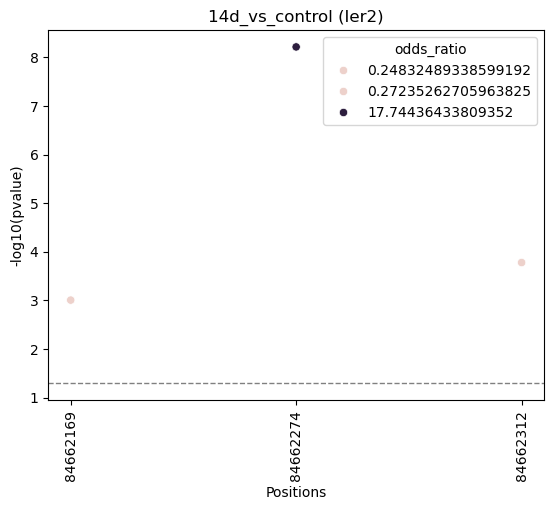

In [29]:
a2i.plot.manhattanplot(or_, fis, p_value_line=0.05)

<Axes: title={'center': 'Ier2'}, xlabel='Positions', ylabel='Editing Frequencies'>

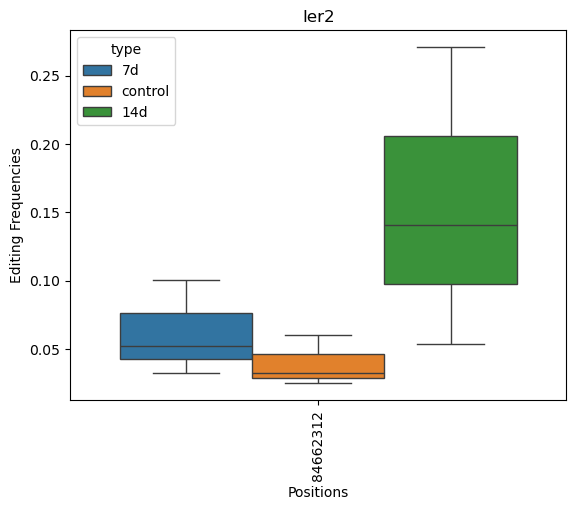

In [28]:
a2i.plot.boxplot(df, positions_to_plot=[fis.columns[-3]])

## Analize ALL region

In [30]:
df, df_a, df_g, region_list = a2i.editing.merge_files(meta)

/mnt/d/GoTx_Folder/src/a2ihelper/editing.py:73: UserWarning: Sorry, all dataset are empty or didn't has A-to-G editing.
  warnings.warn("Sorry, all dataset are empty or didn't has A-to-G editing.")
/mnt/d/GoTx_Folder/src/a2ihelper/editing.py:73: UserWarning: Sorry, all dataset are empty or didn't has A-to-G editing.
  warnings.warn("Sorry, all dataset are empty or didn't has A-to-G editing.")
/mnt/d/GoTx_Folder/src/a2ihelper/editing.py:73: UserWarning: Sorry, all dataset are empty or didn't has A-to-G editing.
  warnings.warn("Sorry, all dataset are empty or didn't has A-to-G editing.")
/mnt/d/GoTx_Folder/src/a2ihelper/editing.py:73: UserWarning: Sorry, all dataset are empty or didn't has A-to-G editing.
  warnings.warn("Sorry, all dataset are empty or didn't has A-to-G editing.")
/mnt/d/GoTx_Folder/src/a2ihelper/editing.py:73: UserWarning: Sorry, all dataset are empty or didn't has A-to-G editing.
  warnings.warn("Sorry, all dataset are empty or didn't has A-to-G editing.")
/mnt/d/GoT

In [31]:
df = a2i.editing.filter_positions(df, nan_filter=True, nan_filter_limit=1,
                                           zero_filter=False, zero_filter_limit=1,
                                           hundred_filter=True, hundred_filter_limit=1)

In [32]:
df

,69095470,69101024,69101526,69101535,69101549,69103136,69103190,69103644,69103934,69104063,...,84662274,84662312,84662355,84662465,84662532,84661540,84661986,84662431,region,type
X1247-ready.bam,13.333333,0.718133,0.696864,1.178451,0.191205,0.506329,0.424628,1.656315,98.871650,0.879121,...,99.962128,0.052425,99.851808,100.000000,99.935505,NaN,NaN,NaN,several,7d
X1249-ready.bam,5.000000,0.367840,0.861632,0.633528,0.273523,0.346260,0.766284,0.641437,99.678457,0.152439,...,99.979524,0.100650,99.830759,99.936245,99.928969,0.163666,0.016741,0.042868,several,7d
X36-ready.bam,NaN,NaN,0.258398,NaN,0.508475,0.413793,0.268456,2.500000,99.522388,0.848356,...,99.992270,0.032595,100.000000,99.947132,100.000000,0.047304,0.089183,0.160085,several,7d
X582-ready.bam,4.929577,0.793448,0.896739,1.020697,0.169837,0.516224,0.818640,1.338028,99.978778,0.613497,...,99.995363,0.060033,99.893928,99.968473,99.982100,0.065690,0.006786,0.023677,several,control
X679-ready.bam,1.081081,0.263745,0.694858,0.603348,0.288376,0.110803,0.969082,1.121718,99.738180,0.364868,...,99.994671,0.025263,99.877345,99.991049,99.945882,0.127065,0.010927,0.031352,several,control
X838-ready.bam,NaN,0.502513,1.789474,0.634921,0.350467,0.941915,0.355030,0.258732,99.891422,NaN,...,100.000000,0.271003,100.000000,99.573379,100.000000,NaN,NaN,0.175901,several,14d
X839-ready.bam,1.428571,NaN,NaN,0.525394,0.393314,0.796813,0.755940,0.987654,99.922780,0.649351,...,99.846449,0.054054,99.608764,100.000000,99.860335,0.426439,0.105485,0.407609,several,14d
X840-ready.bam,1.587302,0.108460,0.209205,1.048218,NaN,0.382166,0.339751,0.581395,99.714013,0.596125,...,99.906213,0.141066,99.864682,99.962784,99.898785,0.098232,0.030017,0.093721,several,14d
X868-ready.bam,NaN,0.749064,0.930752,1.154993,0.390795,NaN,NaN,3.045187,99.874451,0.489130,...,99.994500,0.032649,99.879158,99.979031,99.996647,0.193818,NaN,0.165693,several,control


## Statistics for frequency

### Anova tukey

In [33]:
df_pv = a2i.editing.anova_tukey_test(df, only_pvalue=True, pvalue_filter_limit_anova=1, pvalue_filter_limit_tukey=1, return_only_significant=True)
df_pv

coord,25757351,25758647,25770714,25774562,25778469,25778472,25787443,25787446,69103644,69103934,...,84662193,84662215,84662274,84662312,84662355,84662465,84662532,122150961,167689764,167689796
tests,,,,,,,,,,,,,,,,,,,,,
"(7d, 14d)",0.553663,0.507083,0.602975,0.5636,0.993729,0.657402,0.335815,0.846399,0.378345,0.141461,...,0.844251,0.273844,0.306593,0.277374,0.786165,0.588304,0.680285,0.534289,0.631382,0.783749
"(7d, control)",0.920325,0.425401,0.278544,0.891258,0.999953,0.994099,0.994065,0.852487,0.937416,0.124917,...,0.992594,0.948906,0.89461,0.911826,0.994101,0.985454,0.876986,0.681136,0.93307,0.788968
"(control, 14d)",0.772686,0.985266,0.77033,0.819927,0.994758,0.598895,0.378922,0.546475,0.250782,0.994785,...,0.89789,0.394718,0.174617,0.165646,0.84003,0.500347,0.41793,0.195689,0.828436,0.422401


### Kruskal Dunn

In [34]:
df_pv = a2i.editing.kruskal_dunn_test(df, only_pvalue=True, pvalue_filter_limit_kruskal=1, pvalue_filter_limit_dunn=1, return_only_significant=True)
df_pv

coord,25757351,25758647,25770714,25774562,25778469,25778472,25787443,25787446,69103644,69103934,...,84662193,84662215,84662274,84662312,84662355,84662465,84662532,122150961,167689764,167689796
tests,,,,,,,,,,,,,,,,,,,,,
"(7d, 14d)",0.456057,0.654721,0.550985,0.765594,0.765594,0.369091,0.154993,0.233038,0.10105,0.052632,...,1.0,0.369091,1.0,0.179712,1.0,1.0,0.549316,0.550985,0.456057,0.765594
"(7d, control)",0.765594,0.371093,0.10105,0.881497,0.881497,0.822334,0.881004,0.765594,0.765594,0.036888,...,1.0,0.822334,0.179712,0.654721,0.500545,0.500545,0.708225,0.136037,0.550985,0.296718
"(control, 14d)",0.296718,0.654721,0.296718,0.881497,0.881497,0.261556,0.203225,0.136037,0.052632,0.881497,...,1.0,0.500545,0.179712,0.073638,0.500545,0.500545,0.330541,0.036888,0.881497,0.456057


## Statistics for porprotions

### Pooling smaples/coordinates by G-test

In [35]:
a, g = a2i.editing.pool_positions(df_a[df.columns],df_g[df.columns])

In [36]:
a

,69105526,84662169,84662274,84662312,region,type
type,,,,,,
14d,4.0,4.0,12.0,9692.0,several,14d
7d,9.0,42.0,6.0,23932.0,several,7d
control,32.0,156.0,7.0,99135.0,several,control


In [37]:
g

,69105526,84662169,84662274,84662312,region,type
type,,,,,,
14d,3658.0,8909.0,13061.0,14.0,several,14d
7d,4109.0,21479.0,32863.0,16.0,several,7d
control,13827.0,86280.0,135199.0,39.0,several,control


In [38]:
chi = a2i.editing.chi2_test(a,g,only_pvalue=True,pvalue_filter_limit=.5)
chi

,69105526,84662169,84662274,84662312,region,type
pvalue,0.294574,0.001563,2.372066e-08,0.000568,several,14d_vs_7d_vs_control


In [39]:
chi.columns

Index([69105526, 84662169, 84662274, 84662312, 'region', 'type'], dtype='object')

In [45]:
a.loc[a.type!='control',chi.columns]

,69105526,84662169,84662274,84662312,region,type
type,,,,,,
14d,4.0,4.0,12.0,9692.0,several,14d
7d,9.0,42.0,6.0,23932.0,several,7d


In [46]:
fis = a2i.editing.fisher_test(a.loc[a.type!='control',:],g.loc[g.type!='control',:],only_pvalue=True,pvalue_filter_limit=.5)
fis

,69105526,84662169,84662274,84662312,region,type
pvalue,0.277194,0.001046,0.000849,0.041968,several,14d_vs_7d


In [47]:
or_ = a2i.editing.odds_r(a.loc[a.type!='control',fis.columns], g.loc[g.type!='control',fis.columns])
or_

,69105526,84662169,84662274,84662312,region,type
odds_ratio,0.499283,0.22962,5.032028,0.462847,several,14d_vs_7d


<Axes: title={'center': '14d_vs_7d (several)'}, xlabel='Positions', ylabel='-log10(pvalue)'>

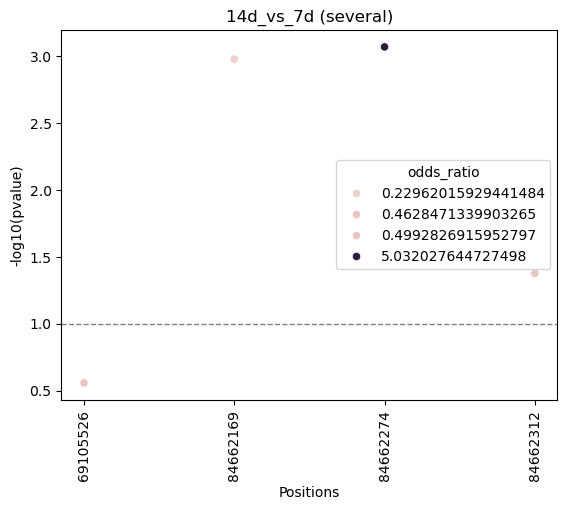

In [48]:
a2i.plot.manhattanplot(or_, fis, p_value_line=0.1)

<Axes: title={'center': 'several'}, xlabel='Positions', ylabel='Editing Frequencies'>

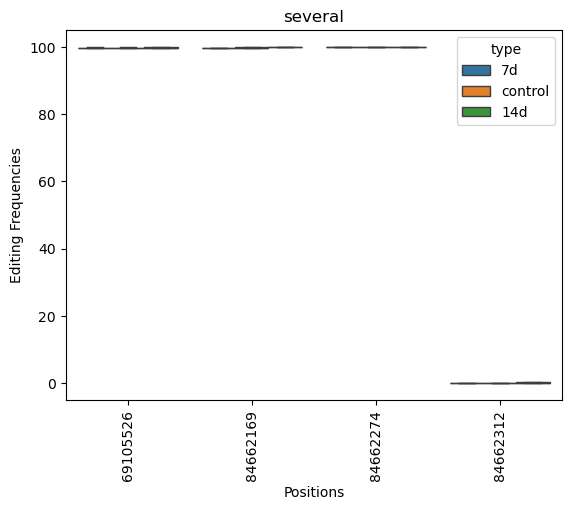

In [49]:
a2i.plot.boxplot(df, positions_to_plot=fis.columns[:-2].tolist())

In [ ]:
a, g = a2i.editing.pool_positions(df_a[df.columns],df_g[df.columns])

In [ ]:
a

In [ ]:
g

In [ ]:
genes_coor = dict()
for g in region_list.keys():
    genes_coor[g] = []
    for c in a.columns[:-2]:
        if c in region_list[g]:
            genes_coor[g].append(c)

In [ ]:
genes_coor

In [ ]:
df_list = []
df_a_list = []
df_g_list = []
region_list = []

for r in meta.iloc[:,2].unique():
    try:
        df, df_a, df_g = a2i.editing.merge_files_one_region(meta[meta.iloc[:,2]==r])
        df_list.append(df.iloc[:,:-2])
        df_a_list.append(df_a.iloc[:,:-2])
        df_g_list.append(df_g.iloc[:,:-2])
        region_list.append(r)
    except:
        pass

df = pd.concat(df_list, axis=1).merge(meta.iloc[:,[1,3]].drop_duplicates().set_index(meta.columns[1]), left_index=True, right_index=True)
df_a = pd.concat(df_a_list, axis=1).merge(meta.iloc[:,[1,3]].drop_duplicates().set_index(meta.columns[1]), left_index=True, right_index=True)
df_g = pd.concat(df_g_list, axis=1).merge(meta.iloc[:,[1,3]].drop_duplicates().set_index(meta.columns[1]), left_index=True, right_index=True)

In [ ]:
v = ['several' for r in range(df.shape[0])]
i = len(df.columns) - 1
df.insert( i, 'region', v)

In [ ]:
df

In [ ]:
df, df_a, df_g = a2i.editing.merge_files(meta[meta.region=='Notch1'])

In [ ]:
df

In [ ]:
{value:key for key,value in gene_coord.items()}['chr16:55811375-55838899']

# Borges Data

In [ ]:
# genes = ['B2M', 'APOL1', 'CD74']
# genes = ['B2m', 'Apol10a', 'Cd74','Ndnf','Pcp4','Pvalb','Notch1',]
genes = ['Clec1a','Clec2g', 'Clec4a4', 'Clec4e', 'Csf3r', 'Cyp4f16',
         'Dscam', 'Gm8774', 'H2bc27', 'Hap1', 'Hdc', 'Hebp1','Ier2', 'Igkv6-23',
         'Kdm6b', 'Klri1', 'Marchf3', 'Mthfs', 'Ncr1','Notch1', 'Per1','Ptchd1',
         'Rnf144a', 'Sgms2', 'Stra6l', 'Xylt1','I830077J02Rik', 'Tlr1', 'Axl',
         'C1qc','Cebpb', 'Il1b', 'Nfkbiz','B2m', 'Apol10a', 'Cd74','Ndnf','Pcp4','Pvalb']
path_ref_annotation='/mnt/e/reference_files/gencode.vM10.annotation.gtf'#gencode.v44.annotation.gtf.gz'

In [ ]:
# t1 = time.time()
# gene_coord = a2i.call_reditools2.get_genes_positions(genes, path_ref_annotation, gzip_file=False)
# gene_coord
# print(np.round( (time.time()-t1), 6 ), np.round( (time.time()-t1)/60, 2 ))

In [ ]:
gene_coord ={'Notch1': 'chr2:26457903-26516663',
 'B2m': 'chr2:122147686-122153083',
 'Hdc': 'chr2:126593667-126619299',
 'Il1b': 'chr2:129364570-129371139',
 'Cebpb': 'chr2:167688915-167690418',
 'I830077J02Rik': 'chr3:105924358-105932664',
 'Sgms2': 'chr3:131318985-131491411',
 'Stra6l': 'chr4:45848664-45887008',
 'Csf3r': 'chr4:126024550-126044440',
 'C1qc': 'chr4:136889804-136893065',
 'Tlr1': 'chr5:64924679-64933563',
 'Ndnf': 'chr6:65671590-65712326',
 'Igkv6-23': 'chr6:70260409-70260955',
 'Clec4a4': 'chr6:122990367-123024105',
 'Clec4e': 'chr6:123281789-123289870',
 'Gm8774': 'chr6:128883852-128884543',
 'Clec2g': 'chr6:128934381-128984707',
 'Clec1a': 'chr6:129424772-129452000',
 'Klri1': 'chr6:129697218-129717132',
 'Hebp1': 'chr6:135137522-135198022',
 'Ncr1': 'chr7:4337724-4345164',
 'Axl': 'chr7:25757273-25788705',
 'Xylt1': 'chr7:117380979-117673580',
 'Ier2': 'chr8:84661331-84662852',
 'Mthfs': 'chr9:89210676-89377713',
 'Per1': 'chr11:69095217-69109960',
 'Kdm6b': 'chr11:69398508-69413675',
 'Hap1': 'chr11:100347327-100356128',
 'Rnf144a': 'chr12:26306797-26415256',
 'Apol10a': 'chr15:77477047-77491069',
 'Pvalb': 'chr15:78191114-78206400',
 'Nfkbiz': 'chr16:55811375-55838899',
 'Pcp4': 'chr16:96467606-96525793',
 'Dscam': 'chr16:96592079-97170752',
 'Cyp4f16': 'chr17:32536558-32551798',
 'Cd74': 'chr18:60803848-60812646',
 'Ptchd1': 'chrX:155573455-155623814'}

In [ ]:
genes_positions = gene_coord.values()
in_bam_file_list = ['/mnt/e/Borges_Project_002/bams/'+f.replace('.bai','') for f in os.listdir('/mnt/e/Borges_Project_002/bams/') if f.endswith('bai')]#'/mnt/e/Borges_Project_002/bams/Allo_EKO_3_S3Aligned.sortedByCoord.out.bam' 
path_out_res = '/mnt/d/GoTx_Folder/tests/res/'
ref_genome_file = '/mnt/e/reference_files/GRCm38.p4.genome.fa'#GRCh38.p14.genome.fa'
path_reditools = '/mnt/d/reditools2.0/src/cineca/'
reditools_options = '--strict'

In [ ]:
# t1 = time.time()
# for in_bam_file in in_bam_file_list:
#     a2i.call_reditools2.run_per_gene_position_list(genes_positions, in_bam_file, path_out_res, ref_genome_file, path_reditools, reditools_options='', n_jobs=10)
# print(np.round( (time.time()-t1), 6 ),'min', np.round( (time.time()-t1)/60, 2 ),'s')

In [ ]:
path = '/mnt/d/GoTx_Folder/tests/res/'
meta = pd.DataFrame(os.listdir(path))
meta.columns = ['file_name']
meta[['sample_name','condition']] = meta['file_name'].str.replace('Aligned.sortedByCoord.out.bam','').str.split('_', expand=True).iloc[:,[3,1]]
meta['file_name'] = path+meta['file_name']
meta['coord'] = meta['file_name'].str.replace('Aligned.sortedByCoord.out.bam','').str.split('_', expand=True).iloc[:,[5,6]].agg(':'.join, axis=1)
meta['coord'] = meta['coord'] + '-' +meta['file_name'].str.replace('Aligned.sortedByCoord.out.bam','').str.split('_', expand=True).iloc[:,7]
meta['region'] = meta['coord'].map({value:key for key,value in gene_coord.items()})
meta = meta[['file_name', 'sample_name', 'region', 'condition', 'coord']]
meta.head()

In [ ]:
df, df_a, df_g = a2i.editing.merge_files(meta[meta.region=='Clec1a'])

In [ ]:
df_filtered = a2i.editing.filter_positions(df.copy(), nan_filter=True, nan_filter_limit=2,
                                           zero_filter=False, zero_filter_limit=2,
                                           hundred_filter=True, hundred_filter_limit=1)

In [ ]:
df_filtered = df_filtered.fillna(0)#.columns[np.where(df_filtered.drop('Region', axis=1).sum()<300)]

In [ ]:
df_filtered.columns

In [ ]:
f = df[df_filtered.columns]

In [ ]:
a, g = a2i.editing.pool_positions(df_a[df_filtered.columns],df_g[df_filtered.columns])

In [ ]:
from scipy.stats.contingency import odds_ratio
res = odds_ratio([a[129439247].astype(int).values, g[129439247].astype(int).values])
res.statistic

In [ ]:
chi = a2i.editing.chi2_test(a,g,only_pvalue=True,pvalue_filter_limit=.1)
chi

In [ ]:
chi = a2i.editing.chi2_test(a,g,only_pvalue=True,pvalue_filter_limit=.1)
chi

fis = a2i.editing.fisher_test(a,g,only_pvalue=True,pvalue_filter_limit=.1)

or_ = a2i.editing.odds_r(a[chi.columns], g[chi.columns])
or_

In [ ]:
a2i.plot.manhattanplot(or_, chi)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def manhattanplot(df_or, df_pv, positions_to_plot:list = None, ax=None, figsize:tuple = None):
    aux_m = pd.concat([df_or,df_pv]).iloc[:,:-2].T.reset_index()
    aux_m['-log10(pvalue)'] = -np.log10(aux_m['pvalue'])
    if ax == None:
        if figsize:
            f, ax = plt.subplots()
        else:
            f, ax = plt.subplots(figsize=figsize)

    x = 'index'
    y = '-log10(pvalue)'
    hue = 'odds_ratio'

    sns.scatterplot(x=x, y=y, hue=hue, data=aux_m, ax=ax)
    ax.set_xlabel('Positions')
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticks().astype(int), rotation=90)
    ax.set_ylabel('-log10(pvalue)')
    ax.set_title(','.join(df_or.iloc[:,-1].unique())+' ('+','.join(df_or.iloc[:,-2].unique())+')')

    return ax

In [ ]:
ax = manhattanplot(or_, chi)

In [ ]:
ax.get_xticks().astype(int)

In [ ]:
ax.get_xticklabels()

In [ ]:
a2i.editing.fisher_test(a,g,only_pvalue=True)

In [ ]:
h = pd.concat([a2i.editing.odds_r(a[[129436640, 129439247, 129439249, 129449617, 'region', 'condition']], g[[129436640, 129439247, 129439249, 129449617, 'region', 'condition']]), a2i.editing.chi2_test(a,g,only_pvalue=True)])

In [ ]:
h

In [ ]:
h.iloc[:,:-2].T.reset_index()

In [ ]:
a2i.editing.kruskal_dunn_test(f,only_pvalue=True, pvalue_filter_limit_kruskal=.9, pvalue_filter_limit_dunn=.2)

In [ ]:
a2i.plot.boxplot(f, positions_to_plot=a2i.editing.kruskal_dunn_test(f,only_pvalue=True, pvalue_filter_limit_kruskal=.9, pvalue_filter_limit_dunn=.2)[1])

In [ ]:
f.columns[:-2].tolist()==None

In [ ]:
isinstance(f.columns[:-2], np.ndarray)

In [ ]:
f.columns[:-2]

In [ ]:
a2i.editing.anova_tukey_test(f)

In [ ]:
f[[129429669, 129442303]+[df.columns[-1]]].melt(id_vars=f.columns[-1])

In [ ]:
    sns.boxplot(y='value', x='variable', hue=f.columns[-1], data=f.drop(f.columns[-2], axis=1).melt(id_vars=f.columns[-1]))

In [ ]:
f.drop(f.columns[-2], axis=1)[[129429669, 129442303]+[df.columns[-1]]].melt(id_vars=f.columns[-1])

In [ ]:
def chi2_test(df_a, df_b, only_pvalue=True, return_only_significant=True, pvalue_filter_limit=0.05):
    aux_pv = []
    for c in df_a.columns[:-2]:
        if only_pvalue:
            aux_pv.append(chi2_contingency([a[c].values, g[c].values], lambda_="log-likelihood").pvalue)
        else:
            aux_pv.append(chi2_contingency([a[c].values, g[c].values], lambda_="log-likelihood"))
            
    if only_pvalue:
        chi2_res = pd.DataFrame(aux_pv, index=df_a.columns[:-2], columns=['pvalue'])     
    else:
        chi2_res = pd.DataFrame(aux_pv, index=df_a.columns[:-2], columns=['statistic','pvalue','dof','expected_freq'])

    if return_only_significant:
        chi2_res = chi2_res[chi2_res.pvalue<=pvalue_filter_limit].T
        
    chi2_res['region'] = df_a.iloc[0,-2]
    chi2_res['condition'] = '_vs_'.join(df_a.condition.unique())
    return chi2_res

def fisher_test(df_a, df_b, only_pvalue=True, return_only_significant=True, pvalue_filter_limit=0.05):
    aux_pv = []
    for c in df_a.columns[:-2]:
        if only_pvalue:
            aux_pv.append(fisher_exact([a[c].values, g[c].values], alternative='two-sided').pvalue)
        else:
            aux_pv.append(fisher_exact([a[c].values, g[c].values], alternative='two-sided'))

    if only_pvalue:
        fisher_res = pd.DataFrame(aux_pv, index=df_a.columns[:-2], columns=['pvalue'])
    else:
        fisher_res = pd.DataFrame(aux_pv, index=df_a.columns[:-2], columns=['statistic','pvalue'])

    if return_only_significant:
        fisher_res = fisher_res[fisher_res.pvalue<=pvalue_filter_limit].T

    fisher_res['region'] = df_a.iloc[0,-2]
    fisher_res['condition'] = '_vs_'.join(df_a.condition.unique())
    return fisher_res

def anova_tukey_test(df, only_pvalue=True, return_only_significant=True, pvalue_filter_limit=0.05):
    """
    Anova with post-hoc test for more than two conditions.

    Parameters
    ----------
    df: df
        pandas DataFrame of editing frequency. Rows are samples and columns are coordinates. The DataFrame must be like merge_files output. The last two columns must be region and conditions.

    Returns
    -------
    DataFrame
        returns p-values for Anova post-hoc test.
    """
    if df.iloc[:,:-2].empty:
        print('The input is an empty DataFrame. In this case the function returns empty list []')
        return False
    res = []
    pos = []
    index_comb = []
    cols_tukey = list(itertools.combinations( df.iloc[:,-1].unique(), 2) )
    conditions = df.iloc[:,-1].unique()
    for c in df.columns[:-2]:
        data_by_condition = []
        for cond in conditions:
            data_by_condition.append(df[df.iloc[:,-1]==cond][c].values)
        aux_aov = f_oneway(*data_by_condition)
        if aux_aov.pvalue<=0.05:
            aux_tukey = tukey_hsd(*data_by_condition)
            if return_only_significant and ((aux_tukey.pvalue <= pvalue_filter_limit).astype(int).sum() > 0):
                for cond_comb in itertools.combinations(range(len(conditions)),2):
                    if only_pvalue:
                        res.append(aux_tukey.pvalue[cond_comb])
                        pos.append(c)
                        index_comb.append(cond_comb)
                    else:
                        res.append(aux_tukey)
                        pos.append(c)
                        index_comb.append(cond_comb)
            elif not return_only_significant:
                for cond_comb in itertools.combinations(range(len(conditions)),2):
                    if only_pvalue:
                        res.append(aux_tukey.pvalue[cond_comb])
                        pos.append(c)
                        index_comb.append(cond_comb)
                    else:
                        res.append(aux_tukey)
                        pos.append(c)
                        index_comb.append(cond_comb)
                        
    return res,pos,index_comb

In [ ]:
a2i.editing.anova_tukey_test(f)

In [ ]:
kruskal(f[f['condition']=='EKO'][129439201], f[f['condition']=='WT'][129439201])

In [ ]:
sp.posthoc_dunn(a=f, val_col=129439201, group_col='condition')

In [ ]:
a2i.editing.kruskal_dunn_test(f, return_only_significant=True, pvalue_filter_limit_kruskal = 0.2, pvalue_filter_limit_dunn= 0.05)

In [ ]:
aux_dunn = sp.posthoc_dunn(a=f, val_col=129442303, group_col='condition')
aux_dunn

In [ ]:
(aux_dunn<=0.2).astype(int).sum().sum()>0

In [ ]:
cond_comb = list(itertools.combinations(sp.posthoc_dunn(a=f, val_col=129442303, group_col='condition').columns,2))
cond_comb

In [ ]:
aux_dunn.loc[cond_comb[0]]

In [ ]:
f.melt(id_vars=['condition','region'])

In [ ]:
f_oneway(f[f['condition']=='EKO'][129442303], f[f['condition']=='WT'][129442303])

In [ ]:
print(tukey_hsd(f[f['condition']=='EKO'][129429669], f[f['condition']=='WT'][129429669]))

In [ ]:
print(tukey_hsd(f[f['condition']=='EKO'][129442303], f[f['condition']=='WT'][129442303]))

In [ ]:
return_only_significant = True
pvalue_filter_limit = 0.05
only_pvalue = True

res = []
pos = []
cols_tukey = list(itertools.combinations( f.iloc[:,-1].unique(), 2) )
conditions = f.iloc[:,-1].unique()
for c in f.columns[:-2]:
    data_by_condition = []
    for cond in conditions:
        data_by_condition.append(f[f.iloc[:,-1]==cond][c].values)
    aux_aov = f_oneway(*data_by_condition)
    if aux_aov.pvalue<=0.05:
        aux_tukey = tukey_hsd(*data_by_condition)
        if return_only_significant and ((aux_tukey.pvalue <= pvalue_filter_limit).astype(int).sum() > 0):
            for cond_comb in itertools.combinations(range(len(conditions)),2):
                if only_pvalue:
                    res.append(aux_tukey.pvalue[cond_comb])\
                else:
                    res.append(aux_tukey)
        elif not return_only_significant:
            for cond_comb in itertools.combinations(range(len(conditions)),2):
                if only_pvalue:
                    res.append(aux_tukey.pvalue[cond_comb])
                else:
                    res.append(aux_tukey)

In [ ]:
res

In [ ]:
# for c in f.columns[:-2]:
c =  f.columns[2]
data_by_condition = []
# aux_aov = []
for cond in f.iloc[:,-1].unique():
    data_by_condition.append(f[f.iloc[:,-1]==cond][c].values)
aux_aov = tukey_hsd(*data_by_condition)
print(aux_aov)
    # break
    # if not aux_aov[aux_aov['p-unc']<=0.1].empty:
    #     aux_tukey = sp.posthoc_tukey(f, val_col=c, group_col=df.columns[-1])

In [ ]:
list(itertools.combinations(range(len(df.iloc[:,-1].unique())),2))

In [ ]:
aux_aov.pvalue[(0, 1)]

In [ ]:
aux_aov.confidence_interval(confidence_level=0.95).low

In [ ]:
aux_aov.confidence_interval(confidence_level=0.95).high

In [ ]:
pd.DataFrame(a2i.editing.chi2_test(a,g,only_pvalue=True))

In [ ]:
pd.DataFrame(a2i.editing.fisher_test(a,g,only_pvalue=True))

In [ ]:
# a2i.editing.
# anova_tukey_test(f)
cols_tukey = list(itertools.combinations( df.iloc[:,-1].unique(), 2) )
cols_tukey

In [ ]:
aux_aov = pg.anova(dv=df.columns[-1], between=df.columns[-1], data=df, detailed=False)

In [ ]:
f[f.iloc[:,-1]=='EKO'][129424893].values

In [ ]:
dict(list(f.groupby('condition')[129425070])).values().values

In [ ]:
dict(list(f.groupby('condition')))

In [ ]:
an = (f[f['condition']=='EKO'][129439638], f[f['condition']=='WT'][129439477])

In [ ]:
f_oneway(*an)

In [ ]:
f_oneway(f[f['condition']=='EKO'][129439638], f[f['condition']=='WT'][129439477])

In [ ]:
f[f.dropna(axis=1).iloc[:,:-2].sum().sort_values().head(20).index]

In [ ]:
a2i.editing.independency_gtest(a,g, only_pvalue=True)

In [ ]:
a2i.editing.independency_gtest(df_a[df_filtered.columns],df_g[df_filtered.columns], only_pvalue=False).dropna(axis=1)

In [ ]:
aux_a, aux_g = a2i.editing.filter_gtest(df_a[df_filtered.columns],df_g[df_filtered.columns])

In [ ]:
'_vs_'.join(df_a.condition.unique())

In [ ]:
aux_g

In [ ]:
df_g

In [ ]:
df_a

In [ ]:
a = df_a.loc[df_a.iloc[:,-1]=='EKO', 129424774 ].values
a

In [ ]:
a>0

In [ ]:
a.sum()

In [ ]:
g = df_g.loc[df_g.iloc[:,-1]=='EKO', 129424774 ].values
g

In [ ]:
from scipy.stats import chi2_contingency, fisher_exact

In [ ]:
chi2_contingency(np.array([[0,1],[1,0]]), lambda_="log-likelihood")

In [ ]:
df.loc[:,129424774]

In [ ]:
df_t = pd.read_csv( '/mnt/d/GoTx_Folder/tests/res/Allo_EKO_3_S3Aligned.sortedByCoord.out.bam_chr15_77477047_77491069_RES.tsv', sep = '\t' )

In [ ]:
df_t = df_t[df_t['Coverage-q30']>=10]
df_t = df_t[df_t.Reference.isin(['A','T'])]
df_t = df_t[(df_t.AllSubs.str.contains('AG')) | (df_t.AllSubs.str.contains('TC'))]
df_t[['count_A','count_C','count_G','count_T']] = df_t['BaseCount[A,C,G,T]'].str.replace('[','',regex=False).str.replace(']','', regex=False).str.split(',',expand=True).apply(pd.to_numeric)
df_t

In [ ]:
np.where((df_t['Reference']=='A'), df_t.count_A, df_t.count_T)

In [ ]:
meta[meta.iloc[:,0] == file].iloc[:,1].values[0]

In [ ]:
df_a[[77480236]]

In [ ]:
df_g[[77480236]]

In [ ]:
df_filtered#[[45874366,45875071]]

In [ ]:
df_g

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# def merge_files(meta):
"""
Merge all RES files (output of REDItools2) in three pandas DataFrames of frequency or count per position.
The first DataFrame is the frequency of editing (A-G or T-C). The Second DataFrame is the count of A (or T) per position. And the last one is the count of G (or C) per postion.

Parameters
----------
meta: df
    A pandas DataFrame with metadata information. The first four columns are mandatory
        First: Full path file names of REDItools2 results tables
        Second: Samples names
        Third: region (gene symbol)
        Fourth: condition

Returns
-------
tuple
    a tuple of three pandas DataFrames (df, df_a, df_g).
    df: frequency of editing
    df_a: counts of A or T
    df_g: counts of G or C
"""
meta = meta[meta.Region=='Apol10a']
FILES = meta.iloc[:,0].unique()
# region = meta.iloc[:,2].values[0]
df_list_a = []
df_list_g = []
samples = []
for file in FILES:
    df = pd.read_csv( file, sep = '\t' )
    samples.append(meta[meta.iloc[:,0] == file].iloc[:,1].values[0])
    if df.empty:
        df_list_a.append( pd.DataFrame({'Position':[-1],
                                        samples[-1]:[np.nan]}).set_index('Position') )
        df_list_g.append( pd.DataFrame({'Position':[-1],
                                        samples[-1]:[np.nan]}).set_index('Position') )
    else:
        df = df[df['Coverage-q30']>=10]
        df = df[df.Reference.isin(['A','T'])]
        df = df[(df.AllSubs.str.contains('AG')) | (df.AllSubs.str.contains('CT'))]
        if df.empty:
            df_list_a.append( pd.DataFrame({'Position':[-1], samples[-1]:[np.nan]}).set_index('Position') )
            df_list_g.append( pd.DataFrame({'Position':[-1], samples[-1]:[np.nan]}).set_index('Position') )
        else:
            df[['count_A','count_C','count_G','count_T']] = df['BaseCount[A,C,G,T]'].str.replace('[','',regex=False).str.replace(']','', regex=False).str.split(',',expand=True).apply(pd.to_numeric)

            df[samples[-1]] = np.where((df['Reference']=='A'), df.count_A, df.count_T)
            df_list_a.append(df[['Position',samples[-1]]].set_index('Position'))

            df[samples[-1]] = np.where((df['Reference']=='T'), df.count_G, df.count_C)
            df_list_g.append(df[['Position',samples[-1]]].set_index('Position'))
# Analysis by gene
df_a = pd.concat(df_list_a, axis=1)
df_g = pd.concat(df_list_g, axis=1)

if (-1 in df_a.index):
    df_a.drop(-1, axis=0, inplace=True)
    df_g.drop(-1, axis=0, inplace=True)

if df_a.empty:
    # print('Region', region , 'has not filterd edited site.')
    # return df_a.T
    pass
else:
    df = pd.DataFrame(100*df_g.values / (df_a.values+df_g.values), columns=samples, index=df_a.index).T
    df = df.merge(meta.iloc[:,[1,3]].drop_duplicates().set_index(meta.columns[1]), left_index=True, right_index=True)

    df_a = df_a.T.merge(meta.iloc[:,[1,3]].drop_duplicates().set_index(meta.columns[1]), left_index=True, right_index=True)
    df_g = df_g.T.merge(meta.iloc[:,[1,3]].drop_duplicates().set_index(meta.columns[1]), left_index=True, right_index=True)
    # return df, df_a, df_g

In [ ]:
df_a

In [ ]:
pd.concat(df_list_a, axis=1)

In [ ]:
def get_genes_positions(genes, path_ref_annotation, gzip_file=True):
    genes_positions_list = []
    if genes:
        if gzip_file:
            for g in genes:
                with gzip.open(path_ref_annotation,'r') as f_gtf:
                    for line in f_gtf:
                        if not line.startswith('#'.encode()):
                            l = line.decode().split('\t')
                            dict_g = { i.split(' ')[0]:i.split(' ')[1] for i in [j.strip() for j in l[-1].replace(';\n','').replace('"','').split(';')] }
                            if (l[2]=='gene') and (dict_g['gene_name']==g):
                                g_list.append(l[0]+':'+l[3]+'-'+l[4])
        else:
            for g in genes:
                with open(path_ref_annotation,'r') as f_gtf:
                    for line in f_gtf:
                        if not line.startswith('#'):
                            l = line.split('\t')
                            dict_g = { i.split(' ')[0]:i.split(' ')[1] for i in [j.strip() for j in l[-1].replace(';\n','').replace('"','').split(';')] }
                            if (l[2]=='gene') and (dict_g['gene_name']==g):
                                genes_positions_list.append(l[0]+':'+l[3]+'-'+l[4])

    if not genes_positions_list:
        warnings.warn('*Returning empty list. Positions of genes were not found in the '+ path_ref_annotation+'. Please verify genes names or gtf file.')

    return genes_positions_list

In [ ]:
g_list = get_genes_positions(genes, path_ref_annotation, gzip_file=False)

In [ ]:
print(g_list)

In [ ]:
genes_positions = ['chr2:122147686-122153083', 'chr18:60803848-60812646', 'chr6:65671590-65712326', 'chr16:96467606-96525793', 'chr15:78191114-78206400']
in_bam_file = '/mnt/e/Borges_Project_002/bams/Allo_EKO_3_S3Aligned.sortedByCoord.out.bam' 
path_out_res = '/mnt/d/GoTx_Folder/tests/'
ref_genome_file = '/mnt/e/reference_files/GRCm38.p4.genome.fa'#GRCh38.p14.genome.fa'
path_reditools = '/mnt/d/reditools2.0/src/cineca/'
reditools_options = '--strict'

In [ ]:
def run_per_gene_position(gene_position: str, in_bam_file: str, path_out_res: str, ref_genome_file: str, path_reditools: str, reditools_options: str) -> list:
    out_file = os.path.join( path_out_res, os.path.basename(in_bam_file)+'_'+gene_position.replace(':','_').replace('-','_')+'_RES.tsv' )
    cmd_list = ['python', 'reditools.py', '-f', in_bam_file, '-r', ref_genome_file, '-o', out_file, '-g', gene_position]
    if reditools_options:
        cmd_list += reditools_options.split(' ')
    subprocess.call(cmd_list, cwd=path_reditools, stdout=subprocess.PIPE)

def run_per_gene_position_list(genes_positions: list, in_bam_file: str, path_out_res: str, ref_genome_file: str, path_reditools: str, reditools_options: str, n_jobs=4):
    arguments_list = zip(genes_positions, itertools.repeat(in_bam_file), itertools.repeat(path_out_res), itertools.repeat(ref_genome_file), itertools.repeat(path_reditools), itertools.repeat(reditools_options))
    with Pool(processes=n_jobs) as p:
        p.starmap(run_per_gene_position, arguments_list)

In [ ]:
run_per_genes(genes_positions, in_bam_file, path_out_res, ref_genome_file, path_reditools, reditools_options='--strict', n_jobs=4)

In [ ]:
import pandas as pd

In [ ]:
type(pd.DataFrame([1,2,3]))

In [ ]:
os.path.basename('/mnt/d/rna_editing/bams/X36-ready.bam')

In [ ]:
itertools.repeat(g_list)

In [ ]:
list(zip(g_list, itertools.repeat(path_ref_annotation)))#, repeat(verboseFlag))

In [ ]:
{ i.split(' ')[0]:i.split(' ')[1] for i in [j.strip() for j in l[-1].replace(';\n','').replace('"','').split(';')] }['gene_name']

In [ ]:
g_list += '--strict -D hhh'.split(' ')

In [ ]:
g_list

In [ ]:
zip(genes_position, itertools.repeat(in_bam_file), itertools.repeat(path_out_res), itertools.repeat(ref_genome_file), itertools.repeat(path_reditools), itertools.repeat(reditools_options))

In [ ]:
67721081,67722967

In [69]:
server = "https://rest.ensembl.org"
ext = '/info/species/'
r = requests.get(server+ext, headers={ "Content-Type" : "application/json"})
if not r.ok:
  r.raise_for_status()

In [155]:
import requests, sys
 
server = "https://rest.ensembl.org"
ext = "/vep/homo_sapiens/region"
headers={ "Content-Type" : "application/json", "Accept" : "application/json"}
r = requests.post(server+ext, headers=headers, data='{ "variants" : ["X  67759438 - G 1", "6  129401662 - C 1" ] }')
 
if not r.ok:
  r.raise_for_status()
  sys.exit()
 
decoded = r.json()
print(repr(decoded))

[{'assembly_name': 'GRCh38', 'most_severe_consequence': 'intergenic_variant', 'intergenic_consequences': [{'impact': 'MODIFIER', 'consequence_terms': ['intergenic_variant'], 'variant_allele': 1}], 'start': 67759438, 'allele_string': 'G/1', 'input': 'X 67759438 - G 1', 'id': '-', 'end': 67759438, 'strand': 1, 'seq_region_name': 'X'}, {'seq_region_name': '6', 'id': '-', 'strand': 1, 'end': 129401662, 'input': '6 129401662 - C 1', 'allele_string': 'C/1', 'transcript_consequences': [{'transcript_id': 'ENST00000421865', 'impact': 'MODIFIER', 'gene_id': 'ENSG00000196569', 'gene_symbol': 'LAMA2', 'gene_symbol_source': 'HGNC', 'consequence_terms': ['intron_variant'], 'biotype': 'protein_coding', 'variant_allele': 1, 'strand': 1, 'hgnc_id': 'HGNC:6482'}, {'gene_id': 'ENSG00000196569', 'gene_symbol': 'LAMA2', 'impact': 'MODIFIER', 'transcript_id': 'ENST00000617695', 'variant_allele': 1, 'strand': 1, 'hgnc_id': 'HGNC:6482', 'biotype': 'protein_coding', 'consequence_terms': ['intron_variant'], 'ge

In [169]:
r = requests.post(server+'/info/', headers=headers)

In [170]:
r.json()

{'error': 'page not found. Please check your uri and refer to our documentation https://rest.ensembl.org/'}

In [165]:
r.ok

False

In [159]:
decoded[1]

{'seq_region_name': '6',
 'id': '-',
 'strand': 1,
 'end': 129401662,
 'input': '6 129401662 - C 1',
 'allele_string': 'C/1',
 'transcript_consequences': [{'transcript_id': 'ENST00000421865',
   'impact': 'MODIFIER',
   'gene_id': 'ENSG00000196569',
   'gene_symbol': 'LAMA2',
   'gene_symbol_source': 'HGNC',
   'consequence_terms': ['intron_variant'],
   'biotype': 'protein_coding',
   'variant_allele': 1,
   'strand': 1,
   'hgnc_id': 'HGNC:6482'},
  {'gene_id': 'ENSG00000196569',
   'gene_symbol': 'LAMA2',
   'impact': 'MODIFIER',
   'transcript_id': 'ENST00000617695',
   'variant_allele': 1,
   'strand': 1,
   'hgnc_id': 'HGNC:6482',
   'biotype': 'protein_coding',
   'consequence_terms': ['intron_variant'],
   'gene_symbol_source': 'HGNC'},
  {'gene_symbol': 'LAMA2',
   'gene_id': 'ENSG00000196569',
   'transcript_id': 'ENST00000618192',
   'impact': 'MODIFIER',
   'hgnc_id': 'HGNC:6482',
   'strand': 1,
   'variant_allele': 1,
   'gene_symbol_source': 'HGNC',
   'biotype': 'protei

In [103]:
import requests, sys
 
server = "https://rest.ensembl.org"
# ext = "/vep/homo_sapiens/region/9:22125503-22125503/G?"
ext = "/vep/mus_musculus/region/X:67759438-67759438/C?"
# ext = "/vep/mus_musculus/region/6:129401662-129401662/C?"
 
r = requests.get(server+ext, headers={ "Content-Type" : "application/json"})
 
if not r.ok:
  r.raise_for_status()
  sys.exit()
 
decoded = r.json()
print(repr(decoded))

[{'input': 'X 67759438 67759438 A/C 1', 'strand': 1, 'colocated_variants': [{'end': 67759438, 'strand': 1, 'start': 67759438, 'id': 'rs8250998', 'variation_id': 3068763, 'allele_string': 'A/C'}], 'end': 67759438, 'most_severe_consequence': '3_prime_UTR_variant', 'seq_region_name': 'X', 'assembly_name': 'GRCm39', 'transcript_consequences': [{'gene_symbol_source': 'MGI', 'transcript_id': 'ENSMUST00000088546', 'biotype': 'protein_coding', 'strand': 1, 'gene_id': 'ENSMUSG00000000838', 'consequence_terms': ['3_prime_UTR_variant'], 'variant_allele': 'C', 'cdna_start': 2278, 'gene_symbol': 'Fmr1', 'cdna_end': 2278, 'impact': 'MODIFIER'}, {'transcript_id': 'ENSMUST00000114653', 'gene_symbol_source': 'MGI', 'biotype': 'protein_coding', 'strand': 1, 'gene_symbol': 'Fmr1', 'cdna_end': 1927, 'cdna_start': 1927, 'impact': 'MODIFIER', 'gene_id': 'ENSMUSG00000000838', 'consequence_terms': ['3_prime_UTR_variant'], 'variant_allele': 'C'}, {'strand': 1, 'transcript_id': 'ENSMUST00000114654', 'biotype': 

In [105]:
decoded[0]['colocated_variants']

[{'end': 67759438,
  'strand': 1,
  'start': 67759438,
  'id': 'rs8250998',
  'variation_id': 3068763,
  'allele_string': 'A/C'}]

In [21]:
import pandas as pd

In [39]:
for d in decoded:
    for d_ in d['colocated_variants']:
        print(d_['id'], d_['stzart'])

rs1818002977 22125503


In [378]:
def call_snp_vep(coordinates:list = [], species:str = 'homo_sapiens', sub:str = 'G'):    
    if sub == 'G':
        ref = 'A'
    elif sub == 'C':
        ref = 'T'
    else:
        raise Exception("Sorry, only G or C are allowed as value for 'sub' parameter.")
    server = 'https://rest.ensembl.org'
    aux = []
    for coord in coordinates:
        chr, crd = coord.split('_')
        # print(chr, crd)
        ext = '/vep/'+species+'/region/'+chr+':'+crd+"-"+crd+'/'+sub+'?'
        print(server+ext)
        r = requests.get(server+ext, headers={ "Content-Type" : "application/json"})
        if r.ok:
            decoded = r.json()
            for d in decoded:
                if 'colocated_variants' in d.keys():
                    for d_ in d['colocated_variants']:
                        if d_['allele_string'].startswith(ref):
                            aux.append([chr+'_'+crd, d_['id']])
                            
    return aux

In [347]:
a,b = '9_00000'.split('_')

In [349]:
b

'00000'

In [326]:
aux = []
ext = '/vep/mus_musculus/region/'+'chr6'.replace('chr','')+':'+str(129401662)+"-"+str(129401662)+'/C?'
r = requests.get(server+ext, headers={ "Content-Type" : "application/json"})
r.json()

[{'seq_region_name': '6',
  'strand': 1,
  'input': '6 129401662 129401662 T/C 1',
  'transcript_consequences': [{'impact': 'MODIFIER',
    'biotype': 'protein_coding',
    'variant_allele': 'C',
    'consequence_terms': ['downstream_gene_variant'],
    'gene_symbol': 'Clec1a',
    'distance': 1989,
    'transcript_id': 'ENSMUST00000037481',
    'strand': -1,
    'gene_symbol_source': 'MGI',
    'gene_id': 'ENSMUSG00000033082'},
   {'gene_id': 'ENSMUSG00000046080',
    'transcript_id': 'ENSMUST00000058352',
    'strand': 1,
    'gene_symbol_source': 'MGI',
    'consequence_terms': ['3_prime_UTR_variant'],
    'gene_symbol': 'Clec9a',
    'cdna_end': 3229,
    'cdna_start': 3229,
    'impact': 'MODIFIER',
    'variant_allele': 'C',
    'biotype': 'protein_coding'},
   {'impact': 'MODIFIER',
    'biotype': 'protein_coding',
    'variant_allele': 'C',
    'consequence_terms': ['downstream_gene_variant'],
    'gene_symbol': 'Clec9a',
    'distance': 2130,
    'transcript_id': 'ENSMUST00000

In [365]:
for r_ in r.json():
    print(r_['colocated_variants'])

[{'strand': 1, 'allele_string': 'T/C', 'variation_id': 64059609, 'id': 'rs37819146', 'end': 129401662, 'start': 129401662}]


In [367]:
r_['seq_region_name']

'6'

In [287]:
decoded = r.json()
for d in decoded:
    if 'colocated_variants' in d.keys():
        for d_ in d['colocated_variants']:
            print(d_['id'], d_['start'])
            aux.append([d_['start'], d_['id']])

In [288]:
# r.json()[0]

In [379]:
aux = call_snp_vep(coordinates=['6_129401662','6_129401666', '6_32710820' ], species='mus_musculus', sub='C') #,84661341,84661342
aux

https://rest.ensembl.org/vep/mus_musculus/region/6:129401662-129401662/C?
https://rest.ensembl.org/vep/mus_musculus/region/6:129401666-129401666/C?
https://rest.ensembl.org/vep/mus_musculus/region/6:32710820-32710820/C?


[['6_129401662', 'rs37819146']]

In [403]:
pd.DataFrame([['6_129401662', 'rs37819146'],['6_101662', 'rs3781914'],['9_129401662', 'rs19146']], columns=['Position','rsID'])

,Position,rsID
0,6_129401662,rs37819146
1,6_101662,rs3781914
2,9_129401662,rs19146


,Region,Position,Reference,Strand,Coverage-q30,MeanQ,"BaseCount[A,C,G,T]",AllSubs,Frequency,gCoverage-q30,gMeanQ,"gBaseCount[A,C,G,T]",gAllSubs,gFrequency
0,chr11,100347377,T,2,2,37.0,"[2, 0, 0, 0]",TA,1.0,-,-,-,-,-
1,chr11,100347378,G,2,2,37.0,"[0, 0, 2, 0]",-,0.0,-,-,-,-,-
2,chr11,100347379,T,2,3,37.0,"[0, 0, 3, 0]",TG,1.0,-,-,-,-,-
3,chr11,100347380,T,2,3,37.0,"[0, 3, 0, 0]",TC,1.0,-,-,-,-,-
4,chr11,100347381,T,2,3,37.0,"[0, 0, 0, 3]",-,0.0,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2966,chr11,100356071,A,2,3,37.0,"[0, 0, 3, 0]",AG,1.0,-,-,-,-,-
2967,chr11,100356072,G,2,3,37.0,"[0, 0, 3, 0]",-,0.0,-,-,-,-,-
2968,chr11,100356073,A,2,3,37.0,"[0, 3, 0, 0]",AC,1.0,-,-,-,-,-
2969,chr11,100356074,G,2,3,37.0,"[0, 0, 3, 0]",-,0.0,-,-,-,-,-


In [190]:
import requests, sys
 
server = "https://rest.ensembl.org"
ext = "/vep/homo_sapiens/hgvs"
# ext = "/vep/mus_musculus/hgvs"
headers={ "Content-Type" : "application/json", "Accept" : "application/json"}
# r = requests.post(server+ext, headers=headers, data='{ "variants" : ["21  26960070  rs116645811 G A . . .", "21  26965148  rs1135638 G A . . ." ] }')
# r = requests.post(server+ext, headers=headers, data='{ "variants" : ["HGNC:26960070:G:A", "HGNC:26965148:G:A" ] }')
r = requests.post(server+ext, headers=headers, data='{ "hgvs_notations" : ["Fmr1:c.67759438A>C", "LAMA2:c.129401662G>T"] }')
 
if not r.ok:
  r.raise_for_status()
  sys.exit()
 
decoded = r.json()
print(repr(decoded))

[{'transcript_consequences': [{'gene_id': 'ENSG00000135744', 'strand': -1, 'cds_end': 776, 'protein_end': 259, 'variant_allele': 'C', 'amino_acids': 'M/T', 'sift_prediction': 'tolerated', 'gene_symbol': 'AGT', 'cdna_start': 843, 'sift_score': 1, 'hgnc_id': 'HGNC:333', 'codons': 'aTg/aCg', 'polyphen_prediction': 'benign', 'biotype': 'protein_coding', 'polyphen_score': 0, 'protein_start': 259, 'cds_start': 776, 'impact': 'MODERATE', 'cdna_end': 843, 'transcript_id': 'ENST00000366667', 'consequence_terms': ['missense_variant'], 'gene_symbol_source': 'HGNC'}, {'distance': 650, 'consequence_terms': ['downstream_gene_variant'], 'transcript_id': 'ENST00000412344', 'impact': 'MODIFIER', 'variant_allele': 'C', 'biotype': 'lncRNA', 'strand': -1, 'gene_id': 'ENSG00000244137'}, {'sift_score': 1, 'cdna_start': 1287, 'hgnc_id': 'HGNC:333', 'gene_symbol': 'AGT', 'sift_prediction': 'tolerated', 'amino_acids': 'M/T', 'variant_allele': 'C', 'cds_end': 776, 'protein_end': 259, 'gene_id': 'ENSG00000135744

In [193]:
decoded[0]#['id'], decoded[1]['id']

{'transcript_consequences': [{'gene_id': 'ENSG00000135744',
   'strand': -1,
   'cds_end': 776,
   'protein_end': 259,
   'variant_allele': 'C',
   'amino_acids': 'M/T',
   'sift_prediction': 'tolerated',
   'gene_symbol': 'AGT',
   'cdna_start': 843,
   'sift_score': 1,
   'hgnc_id': 'HGNC:333',
   'codons': 'aTg/aCg',
   'polyphen_prediction': 'benign',
   'biotype': 'protein_coding',
   'polyphen_score': 0,
   'protein_start': 259,
   'cds_start': 776,
   'impact': 'MODERATE',
   'cdna_end': 843,
   'transcript_id': 'ENST00000366667',
   'consequence_terms': ['missense_variant'],
   'gene_symbol_source': 'HGNC'},
  {'distance': 650,
   'consequence_terms': ['downstream_gene_variant'],
   'transcript_id': 'ENST00000412344',
   'impact': 'MODIFIER',
   'variant_allele': 'C',
   'biotype': 'lncRNA',
   'strand': -1,
   'gene_id': 'ENSG00000244137'},
  {'sift_score': 1,
   'cdna_start': 1287,
   'hgnc_id': 'HGNC:333',
   'gene_symbol': 'AGT',
   'sift_prediction': 'tolerated',
   'amino

In [273]:
# hgvs = ["ENST00000366667.6:c.776T>C", "ENST00000335295.4:c.20A>T", "ENST00000415952.1:c.-149-34206G>T"]

import requests, sys
 
server = "https://rest.ensembl.org"
# ext = "/vep/homo_sapiens/region/"
ext = "/vep/homo_sapiens/hgvs"
# ext = "/vep/mus_musculus/hgvs"
headers={ "Content-Type" : "application/json", "Accept" : "application/json"}
# r = requests.post(server+ext, headers=headers, data='{ "variants" : ["21  26960070  rs116645811 G A . . .", "21  26965148  rs1135638 G A . . ." ] }')
# r = requests.post(server+ext, headers=headers, data='{ "variants" : ["1 4878140 . T G . . .", "2 3115318 . T C . . ." ] }')
# r = requests.post(server+ext, headers=headers, data='{ "hgvs_notations" : ["ENST00000366667.6:c.776T>C", "ENST00000335295.4:c.20A>T", "ENST00000415952.1:c.-149-34206G>T"] }')
# r = requests.post(server+ext, headers=headers, data='{ "hgvs_notations" : ["AGT:c.776T>C", "HBB:c.20A>T", "OSBPL3:c.-149-34206A>T"] }')
# r = requests.post(server+ext, headers=headers, data='{ "hgvs_notations" : ["1:g.776T>C", "8:g.84661333A>G","RALYL:c.84661333A>G", "11:g.-149-34206A>T", "9:g.22125504G>C"] }')
r = requests.post(server+ext, headers=headers, data='{ "hgvs_notations" : ["9:g.22125504G>C", "21:g.26965148G>A", "NC_000006:g.32710820"] }')
 
if not r.ok:
  r.raise_for_status()
  sys.exit()
 
decoded = r.json()
print(repr(decoded))

[{'start': 22125504, 'strand': 1, 'seq_region_name': '9', 'id': '9:g.22125504G>C', 'colocated_variants': [{'clin_sig_allele': 'C:risk_factor', 'var_synonyms': {'ClinVar': ['RCV001003460', 'VCV000812642'], 'PharmGKB': ['PA166157726']}, 'strand': 1, 'start': 22125504, 'pubmed': [21894447, 29972410, 30571812, 34137427, 34276231, 22403240, 22856518, 24728607, 30988702, 18780302, 29340220, 27424552, 26252781, 17634449, 18852197, 18979498, 19164808, 19207022, 19750184, 19924713, 19955471, 20017983, 20098575, 20159871, 20549515, 20981302, 21242481, 21369780, 21606135, 21698238, 21804106, 21860704, 22042884, 22144573, 22623978, 23468967, 24932356, 26847647, 26958643, 28686695, 32858814, 26950853, 28209224, 20502693, 19956433, 21297524, 22429504, 22848412, 26483964, 22199011, 29472232, 19474294, 21149552, 29331485, 23963167, 27153677, 30065929, 24676469, 17554300, 27892471, 24098343, 35379196, 18224312, 18533027, 31053292, 23142796, 27386823, 26677855, 34296082, 33488114, 25617895, 29143599, 22

In [274]:
for variant in decoded:
    # get the data
    input = variant['input']
    colocated_list = []
    for colocated in variant['colocated_variants']:
        colocated_list.append(colocated['id'])
    print (input + ": " + (', '.join(colocated_list)))

9:g.22125504G>C: rs1333049
21:g.26965148G>A: rs1987612529


In [223]:
for variant in decoded_1:
    # get the data
    input = variant['input']
    colocated_list = []
    for colocated in variant['colocated_variants']:
        colocated_list.append(colocated['id'])
    print (input + ": " + (', '.join(colocated_list)))

ENST00000366667.6:c.776T>C: CM920010, COSV64184214, rs699
ENST00000335295.4:c.20A>T: CD830010, CM097155, CM880038, rs334
ENST00000415952.1:c.-149-34206G>T: rs123


In [208]:
for d in decoded[0]:
    print(d['id'])

TypeError: string indices must be integers, not 'str'

In [202]:
# decoded_1 = decoded
decoded_1[2]

{'colocated_variants': [{'frequencies': {'T': {'gnomadg_asj': 0.5493,
     'gnomadg_ami': 0.5692,
     'gnomadg_eas': 0.9087,
     'sas': 0.7311,
     'eas': 0.9038,
     'afr': 0.7269,
     'gnomadg': 0.5835,
     'eur': 0.5119,
     'gnomadg_fin': 0.5157,
     'gnomadg_nfe': 0.4895,
     'gnomadg_mid': 0.4873,
     'amr': 0.6383,
     'gnomadg_afr': 0.7038,
     'gnomadg_sas': 0.7124,
     'gnomadg_amr': 0.5889,
     'gnomadg_oth': 0.5373,
     'af': 0.7079}},
   'start': 24926827,
   'seq_region_name': '7',
   'end': 24926827,
   'allele_string': 'C/A/G/T',
   'id': 'rs123',
   'strand': 1}],
 'seq_region_name': '7',
 'end': 24926827,
 'strand': -1,
 'regulatory_feature_consequences': [{'impact': 'MODIFIER',
   'consequence_terms': ['regulatory_region_variant'],
   'biotype': 'enhancer',
   'variant_allele': 'T',
   'regulatory_feature_id': 'ENSR00001272235'}],
 'id': 'ENST00000415952.1:c.-149-34206G>T',
 'input': 'ENST00000415952.1:c.-149-34206G>T',
 'allele_string': 'G/T',
 'start

In [182]:
import json
hgvs = ["ENST00000366667.6:c.776T>C", "ENST00000335295.4:c.20A>T", "ENST00000415952.1:c.-149-34206G>T"]

# convert the list into json format
hgvs_json = json.dumps({ "hgvs_notations" : hgvs })

In [183]:
hgvs_json

'{"hgvs_notations": ["ENST00000366667.6:c.776T>C", "ENST00000335295.4:c.20A>T", "ENST00000415952.1:c.-149-34206G>T"]}'

In [297]:
import requests, sys
 
server = "https://rest.ensembl.org"
ext = "/vep/human/region/1:6524705:6524705/T?"
 
r = requests.get(server+ext, headers={ "Content-Type" : "application/json"})
 
if not r.ok:
  r.raise_for_status()
  sys.exit()
 
decoded = r.json()
print(repr(decoded))

[{'seq_region_name': '1', 'end': 6524705, 'start': 6524705, 'most_severe_consequence': '3_prime_UTR_variant', 'assembly_name': 'GRCh38', 'transcript_consequences': [{'strand': -1, 'cdna_start': 3269, 'gene_symbol_source': 'HGNC', 'consequence_terms': ['3_prime_UTR_variant'], 'cdna_end': 3269, 'variant_allele': 'T', 'impact': 'MODIFIER', 'hgnc_id': 'HGNC:26265', 'gene_id': 'ENSG00000162408', 'transcript_id': 'ENST00000377705', 'biotype': 'protein_coding', 'gene_symbol': 'NOL9'}, {'gene_symbol': 'PLEKHG5', 'transcript_id': 'ENST00000377740', 'biotype': 'protein_coding', 'gene_id': 'ENSG00000171680', 'hgnc_id': 'HGNC:29105', 'impact': 'MODIFIER', 'variant_allele': 'T', 'distance': 4696, 'consequence_terms': ['upstream_gene_variant'], 'gene_symbol_source': 'HGNC', 'strand': -1}, {'gene_symbol': 'PLEKHG5', 'transcript_id': 'ENST00000675812', 'biotype': 'protein_coding', 'gene_id': 'ENSG00000171680', 'hgnc_id': 'HGNC:29105', 'impact': 'MODIFIER', 'variant_allele': 'T', 'distance': 4631, 'con

In [309]:
import requests, sys
 
server = "https://rest.ensembl.org"
ext = "/vep/human/region/1:6524705:6524705/A?"
 
r = requests.get(server+ext, headers={ "Content-Type" : "application/json"})
 
if not r.ok:
  r.raise_for_status()
  sys.exit()
 
decoded = r.json()
print(repr(decoded))

HTTPError: 400 Client Error: Bad Request for url: https://rest.ensembl.org/vep/human/region/1:6524705:6524705:2/A

In [306]:
for d in decoded[0]:
    print(d['strand'])

TypeError: string indices must be integers, not 'str'

In [307]:
decoded[0]

{'strand': 1,
 'id': '1_6524705_G/T',
 'assembly_name': 'GRCh38',
 'most_severe_consequence': '3_prime_UTR_variant',
 'transcript_consequences': [{'variant_allele': 'T',
   'consequence_terms': ['3_prime_UTR_variant'],
   'cdna_end': 3269,
   'gene_symbol_source': 'HGNC',
   'cdna_start': 3269,
   'strand': -1,
   'gene_symbol': 'NOL9',
   'biotype': 'protein_coding',
   'transcript_id': 'ENST00000377705',
   'gene_id': 'ENSG00000162408',
   'impact': 'MODIFIER',
   'hgnc_id': 'HGNC:26265'},
  {'strand': -1,
   'consequence_terms': ['upstream_gene_variant'],
   'distance': 4696,
   'variant_allele': 'T',
   'gene_symbol_source': 'HGNC',
   'impact': 'MODIFIER',
   'hgnc_id': 'HGNC:29105',
   'gene_symbol': 'PLEKHG5',
   'gene_id': 'ENSG00000171680',
   'transcript_id': 'ENST00000377740',
   'biotype': 'protein_coding'},
  {'impact': 'MODIFIER',
   'hgnc_id': 'HGNC:29105',
   'gene_symbol': 'PLEKHG5',
   'gene_id': 'ENSG00000171680',
   'biotype': 'protein_coding',
   'transcript_id': '

In [391]:
df#.loc[:,~df.columns.isin([])]

,Region,Position,Reference,Strand,Coverage-q30,MeanQ,"BaseCount[A,C,G,T]",AllSubs,Frequency,gCoverage-q30,gMeanQ,"gBaseCount[A,C,G,T]",gAllSubs,gFrequency
0,chr11,100347377,T,2,2,37.0,"[2, 0, 0, 0]",TA,1.0,-,-,-,-,-
1,chr11,100347378,G,2,2,37.0,"[0, 0, 2, 0]",-,0.0,-,-,-,-,-
2,chr11,100347379,T,2,3,37.0,"[0, 0, 3, 0]",TG,1.0,-,-,-,-,-
3,chr11,100347380,T,2,3,37.0,"[0, 3, 0, 0]",TC,1.0,-,-,-,-,-
4,chr11,100347381,T,2,3,37.0,"[0, 0, 0, 3]",-,0.0,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2966,chr11,100356071,A,2,3,37.0,"[0, 0, 3, 0]",AG,1.0,-,-,-,-,-
2967,chr11,100356072,G,2,3,37.0,"[0, 0, 3, 0]",-,0.0,-,-,-,-,-
2968,chr11,100356073,A,2,3,37.0,"[0, 3, 0, 0]",AC,1.0,-,-,-,-,-
2969,chr11,100356074,G,2,3,37.0,"[0, 0, 3, 0]",-,0.0,-,-,-,-,-


# PAPER DEMO

In [31]:
import os
import time
import itertools

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
# from adjustText import adjust_text
from statannotations.Annotator import Annotator

# import warnings
from scipy.stats import chi2_contingency, fisher_exact, f_oneway, tukey_hsd, kruskal


In [2]:
import sys
sys.path.append('/mnt/d/GoTx_Folder/src')
# from a2ihelper import call_reditools, 
import a2ihelper as a2i

In [3]:
# Files from PRJNA605715_GSE145011 paper
df_genes_demo = pd.read_excel('/mnt/e/editing_methods/PRJNA605715_GSE145011/mmc3.xlsx', sheet_name='Table S3b', header=1)
df_genes_demo_en = pd.read_excel('/mnt/e/editing_methods/PRJNA605715_GSE145011/mmc3.xlsx', sheet_name='Table S3a', header=1)
df_genes_demo_en_2 = pd.read_csv('/mnt/e/editing_methods/PRJNA605715_GSE145011/mmc4.txt', sep=' ')

df_genes_demo['count'] = df_genes_demo.gene.map(dict(dict(df_genes_demo_en.groupby('Gene').count().Region)))
df_genes_demo['count2'] = df_genes_demo.gene.map(dict(df_genes_demo_en_2.groupby('SYMBOL').count().sort_values('R_P', ascending=False).R_P))
df_genes_demo['count3'] = df_genes_demo['count'].fillna(df_genes_demo['count2'])
df_genes_demo['count3'] = df_genes_demo['count3'].fillna(df_genes_demo['count'])
df_genes_demo['-log10(fdr)'] = -np.log10(df_genes_demo['p.adj'])

/tmp/ipykernel_240178/2964043289.py:4: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  df_genes_demo_en_2 = pd.read_csv('/mnt/e/editing_methods/PRJNA605715_GSE145011/mmc4.txt', sep=' ')


In [4]:
gene_list = df_genes_demo.sort_values(['count2','-log10(fdr)'], ascending=False).head(100).gene.tolist()+['ADAR','UBR4','WDR12','APOL1']
path_ref_annotation='/mnt/e/editing_methods/PRJNA605715_GSE145011/gencode.v44.basic.annotation.gtf'

In [5]:
len(gene_list)

104

In [179]:
t1 = time.time()
gene_coord = a2i.call_reditools2.get_genes_positions(gene_list, path_ref_annotation, gzip_file=False)
gene_coord
print(np.round( (time.time()-t1), 6 ), np.round( (time.time()-t1)/60, 2 ))

18.453151 0.31


In [6]:
gene_coord = {'MRPL20': 'chr1:1401909-1407293', 'ATAD3B': 'chr1:1471765-1497848', 'CEP104': 'chr1:3812086-3857396', 'TNFRSF9': 'chr1:7915871-7943165', 'H6PD': 'chr1:9234774-9271337', 'DFFA': 'chr1:10456522-10472529', 'UBR4': 'chr1:19074510-19210266', 'PHACTR4': 'chr1:28369582-28500364', 'EPB41': 'chr1:28887091-29120046', 'MACF1': 'chr1:39081316-39487177', 'RNF115': 'chr1:145738868-145824095', 'ADAR': 'chr1:154581695-154628013', 'GON4L': 'chr1:155749659-155859400', 'RABGAP1L': 'chr1:174159410-174995308', 'EIF2AK2': 'chr2:37099210-37157522', 'MRPL30': 'chr2:99181152-99199561', 'UGGT1': 'chr2:128091200-128195677', 'R3HDM1': 'chr2:135531455-135725270', 'METTL8': 'chr2:171315746-171434802', 'WDR12': 'chr2:202874261-203014798', 'NDUFS1': 'chr2:206114817-206159509', 'GIGYF2': 'chr2:232697299-232860605', 'FANCD2': 'chr3:10026370-10101932', 'NUP210': 'chr3:13316235-13420322', 'TBC1D5': 'chr3:17157162-18444817', 'LIMD1': 'chr3:45555394-45686341', 'IL17RB': 'chr3:53846568-53865794', 'HTT': 'chr4:3041363-3243957', 'PPM1K': 'chr4:88257620-88284769', 'TMEM192': 'chr4:165070608-165208549', 'DNAJC21': 'chr5:34929559-34958964', 'CCDC125': 'chr5:69280175-69332809', 'LYRM7': 'chr5:131170944-131205428', 'RAD50': 'chr5:132556019-132646349', 'PCBD2': 'chr5:134905120-135007959', 'ERGIC1': 'chr5:172834251-172952792', 'SQSTM1': 'chr5:179806398-179838078', 'TAF8': 'chr6:42050513-42087461', 'POLH': 'chr6:43576185-43620523', 'MDN1': 'chr6:89642498-89819794', 'NUP43': 'chr6:149724315-149749665', 'VPS41': 'chr7:38722974-38932394', 'PPIA': 'chr7:44796680-44824564', 'VOPP1': 'chr7:55436056-55572988', 'CRCP': 'chr7:66114604-66154568', 'LINC00174': 'chr7:66376044-66493566', 'POM121': 'chr7:72879349-72951440', 'METTL2B': 'chr7:128476729-128506602', 'HIPK2': 'chr7:139561570-139777998', 'ESYT2': 'chr7:158730995-158830253', 'MCPH1': 'chr8:6406592-6648508', 'PVT1': 'chr8:127794526-128187101', 'FBXO10': 'chr9:37510892-37576380', 'TRAF1': 'chr9:120902393-120929173', 'TRUB2': 'chr9:128305159-128322447', 'RAPGEF1': 'chr9:131576770-131740076', 'WDFY4': 'chr10:48684873-48982956', 'C11orf58': 'chr11:16613132-16758340', 'BCAT1': 'chr12:24810024-24949101', 'XPOT': 'chr12:64404392-64451125', 'SLC35E3': 'chr12:68746125-68793964', 'MDM2': 'chr12:68808177-68845544', 'SLC25A3': 'chr12:98593591-98606379', 'EP400': 'chr12:131949942-132080460', 'POLE': 'chr12:132623753-132687376', 'GOLGA3': 'chr12:132768902-132829143', 'TEP1': 'chr14:20365667-20413501', 'ZNF106': 'chr15:42412823-42491141', 'SPG11': 'chr15:44554818-44663688', 'PML': 'chr15:73994673-74047827', 'CARHSP1': 'chr16:8852942-8869012', 'CIITA': 'chr16:10866222-10943021', 'CLEC16A': 'chr16:10944539-11182186', 'NDE1': 'chr16:15643267-15734691', 'SPN': 'chr16:29662979-29670876', 'CCL22': 'chr16:57358783-57366189', 'KIF1C': 'chr17:4997950-5028401', 'TOP3A': 'chr17:18271428-18315007', 'NF1': 'chr17:31094927-31382116', 'ACACA': 'chr17:37084992-37406836', 'IKZF3': 'chr17:39757718-39864312', 'PRR11': 'chr17:59155732-59206709', 'METTL2A': 'chr17:62423875-62453385', 'RNF213': 'chr17:80260852-80398794', 'EBI3': 'chr19:4229523-4237528', 'CD70': 'chr19:6583183-6604103', 'CERS4': 'chr19:8206736-8262421', 'PRKCSH': 'chr19:11435284-11450968', 'PGPEP1': 'chr19:18340598-18369950', 'ZNF506': 'chr19:19785839-19821751', 'TIMM50': 'chr19:39480412-39493785', 'RPS19': 'chr19:41860255-41872925', 'RPL28': 'chr19:55385932-55403250', 'MAVS': 'chr20:3846799-3876123', 'CBFA2T2': 'chr20:33490075-33650036', 'TCFL5': 'chr20:62841005-62861822', 'MICAL3': 'chr22:17787649-18024561', 'TANGO2': 'chr22:20017014-20067164', 'APOL1': 'chr22:36253071-36267530', 'SYAP1': 'chrX:16719612-16765340', 'SLC9A7': 'chrX:46599251-46759118', 'RBM3': 'chrX:48574449-48581162', 'GNL3L': 'chrX:54530183-54621521', 'MAGT1': 'chrX:77825747-77899271'}
print(gene_coord)

{'MRPL20': 'chr1:1401909-1407293', 'ATAD3B': 'chr1:1471765-1497848', 'CEP104': 'chr1:3812086-3857396', 'TNFRSF9': 'chr1:7915871-7943165', 'H6PD': 'chr1:9234774-9271337', 'DFFA': 'chr1:10456522-10472529', 'UBR4': 'chr1:19074510-19210266', 'PHACTR4': 'chr1:28369582-28500364', 'EPB41': 'chr1:28887091-29120046', 'MACF1': 'chr1:39081316-39487177', 'RNF115': 'chr1:145738868-145824095', 'ADAR': 'chr1:154581695-154628013', 'GON4L': 'chr1:155749659-155859400', 'RABGAP1L': 'chr1:174159410-174995308', 'EIF2AK2': 'chr2:37099210-37157522', 'MRPL30': 'chr2:99181152-99199561', 'UGGT1': 'chr2:128091200-128195677', 'R3HDM1': 'chr2:135531455-135725270', 'METTL8': 'chr2:171315746-171434802', 'WDR12': 'chr2:202874261-203014798', 'NDUFS1': 'chr2:206114817-206159509', 'GIGYF2': 'chr2:232697299-232860605', 'FANCD2': 'chr3:10026370-10101932', 'NUP210': 'chr3:13316235-13420322', 'TBC1D5': 'chr3:17157162-18444817', 'LIMD1': 'chr3:45555394-45686341', 'IL17RB': 'chr3:53846568-53865794', 'HTT': 'chr4:3041363-32439

## Calling REDItool2

In [ ]:
# %bash
# #!/bin/bash

# pathIn="/mnt/d/rna_editing/"

# arr=(${pathIn}*ready.bam)
# for filename in ${arr[@]##*/}; do
#     echo ${filename}
#     time samtools index ${pathIn}${filename}
# done
# echo "BAI files DONE!"

In [7]:
genes_positions = gene_coord.values()
in_bam_file_list = ['/mnt/e/editing_methods/PRJNA605715_GSE145011/star_1pass/'+f for f in os.listdir('/mnt/e/editing_methods/PRJNA605715_GSE145011/star_1pass/') if f.endswith('bam')]
path_out_res = '/mnt/e/editing_methods/PRJNA605715_GSE145011/RES/'
ref_genome_file = '/mnt/e/reference_files/GRCh38.p14.genome.fa'
path_reditools = '/mnt/d/reditools2.0/src/cineca/'
reditools_options = '--strict'

In [296]:
t1 = time.time()
time_list = []
for in_bam_file in ['/mnt/e/editing_methods/PRJNA605715_GSE145011/star_1pass/SRR11050923_Aligned.sortedByCoord.out.bam']:#in_bam_file_list:
    time_list.append(time.time())
    a2i.call_reditools2.run_per_gene_position_list(genes_positions, in_bam_file, path_out_res, ref_genome_file, path_reditools, reditools_options='', n_jobs=10)
    time_list[-1] = time.time() - time_list[-1]
    print('#',end=' ')
print(np.round( (time.time()-t1), 6 ),'s', np.round( (time.time()-t1)/60, 2 ),'min')

# 671.719007 s 11.2 min


# Metadata file

In [8]:
import gzip

meta_names = ['!Sample_title','!Sample_geo_accession', '!Sample_source_name_ch1', '!Sample_source_name_ch2','!Sample_characteristics_ch1']
gse_meta = open('/mnt/e/editing_methods/PRJNA605715_GSE145011/'+'PRJNA605715_GSE145011_meta.tsv', 'w')

with gzip.open('/mnt/e/editing_methods/PRJNA605715_GSE145011/'+'GSE145011_series_matrix.txt.gz') as gse:
    expr_flag = False
    for line in gse:
        if line.decode().split('\t')[0] in meta_names:            
            gse_meta.write(line.decode())
gse_meta.close()

In [9]:
meta_1 = pd.read_csv('/mnt/e/editing_methods/PRJNA605715_GSE145011/PRJNA605715_GSE145011_meta.tsv', sep='\t', index_col=0).T.reset_index()#.set_index('!Sample_geo_accession')
meta_1[['cell_line','condition']] = meta_1['index'].str.split('_', expand=True)
# meta_1 = meta_1.drop(['index'], axis=1)
meta_1.columns = ['cell_line_condition','geo_acc','1','genotype','tissue','4','cell_line', 'condition']
meta_1 = meta_1.drop(['1', '4'], axis=1)
meta_1['genotype'] = meta_1['genotype'].str.replace('genotype: ','')
meta_1['tissue'] = meta_1['tissue'].str.replace('tissue: ','')

meta_2 = pd.read_csv('/mnt/e/editing_methods/PRJNA605715_GSE145011/SraRunTable.txt')[['Run','Sample Name']]
meta_2.columns = ['Run','geo_acc']

meta_1 = meta_1.merge(meta_2, on='geo_acc')

In [10]:
meta_1

,cell_line_condition,geo_acc,genotype,tissue,cell_line,condition,Run
0,A549_WT1,GSM4304246,wild type,Lung carcinoma,A549,WT1,SRR11050913
1,A549_WT2,GSM4304247,wild type,Lung carcinoma,A549,WT2,SRR11050914
2,A549_WT3,GSM4304248,wild type,Lung carcinoma,A549,WT3,SRR11050915
3,A549_KO1,GSM4304249,ADAR1-/-,Lung carcinoma,A549,KO1,SRR11050916
4,A549_KO2,GSM4304250,ADAR1-/-,Lung carcinoma,A549,KO2,SRR11050917
5,A549_KO3,GSM4304251,ADAR1-/-,Lung carcinoma,A549,KO3,SRR11050918
6,RC-K8_WT1,GSM4304252,wild type,B-cell lymphoma,RC-K8,WT1,SRR11050919
7,RC-K8_WT2,GSM4304253,wild type,B-cell lymphoma,RC-K8,WT2,SRR11050920
8,RC-K8_WT3,GSM4304254,wild type,B-cell lymphoma,RC-K8,WT3,SRR11050921
9,RC-K8_KO1,GSM4304255,ADAR1-/-,B-cell lymphoma,RC-K8,KO1,SRR11050922


In [11]:
meta = pd.DataFrame(os.listdir(path_out_res))
meta.columns = ['file_name']
meta[['Run','coord']] = meta.file_name.str.split('_Aligned.sortedByCoord.out.bam_', n=1, expand=True)
meta['coord'] = meta.coord.str.replace('_RES.tsv','')
meta['coord'] = meta.coord.str.replace('_',':', n=1)
meta['coord'] = meta.coord.str.replace('_','-')
meta['region'] = meta['coord'].map({value:key for key,value in gene_coord.items()})
meta['file_name'] = path_out_res+meta.file_name

meta = meta.merge(meta_1, on='Run')

meta = meta[['file_name', 'Run', 'region', 'genotype', 'cell_line_condition', 'condition','cell_line',  'coord']]
meta

,file_name,Run,region,genotype,cell_line_condition,condition,cell_line,coord
0,/mnt/e/editing_methods/PRJNA605715_GSE145011/R...,SRR11050913,WDFY4,wild type,A549_WT1,WT1,A549,chr10:48684873-48982956
1,/mnt/e/editing_methods/PRJNA605715_GSE145011/R...,SRR11050913,C11orf58,wild type,A549_WT1,WT1,A549,chr11:16613132-16758340
2,/mnt/e/editing_methods/PRJNA605715_GSE145011/R...,SRR11050913,EP400,wild type,A549_WT1,WT1,A549,chr12:131949942-132080460
3,/mnt/e/editing_methods/PRJNA605715_GSE145011/R...,SRR11050913,POLE,wild type,A549_WT1,WT1,A549,chr12:132623753-132687376
4,/mnt/e/editing_methods/PRJNA605715_GSE145011/R...,SRR11050913,GOLGA3,wild type,A549_WT1,WT1,A549,chr12:132768902-132829143
...,...,...,...,...,...,...,...,...
1243,/mnt/e/editing_methods/PRJNA605715_GSE145011/R...,SRR11050924,SYAP1,ADAR1-/-,RC-K8_KO3,KO3,RC-K8,chrX:16719612-16765340
1244,/mnt/e/editing_methods/PRJNA605715_GSE145011/R...,SRR11050924,SLC9A7,ADAR1-/-,RC-K8_KO3,KO3,RC-K8,chrX:46599251-46759118
1245,/mnt/e/editing_methods/PRJNA605715_GSE145011/R...,SRR11050924,RBM3,ADAR1-/-,RC-K8_KO3,KO3,RC-K8,chrX:48574449-48581162
1246,/mnt/e/editing_methods/PRJNA605715_GSE145011/R...,SRR11050924,GNL3L,ADAR1-/-,RC-K8_KO3,KO3,RC-K8,chrX:54530183-54621521


In [12]:
# meta_ex = meta[(meta.region.isin(['MAVS'])) & (meta.cell_line=='A549')]
# meta_ex['file_name'] = meta_ex.file_name.str.replace('/mnt/e/editing_methods/PRJNA605715_GSE145011/RES/','~/.../').str.replace('Aligned.sortedByCoord.out.bam_','')
# meta_ex = meta_ex[['file_name', 'Run', 'region', 'genotype']]
# meta_ex.columns = ['file_name', 'Run', 'region', 'condition']
# meta_ex.to_csv('/mnt/d/GoTx_Folder/draft/metaexample.csv', index=False)

In [15]:
time1 = time.time()
df, df_a, df_g, region_list = a2i.editing.merge_files_all_regions(meta)#[meta.cell_line=='RC-K8'])
time2 = time.time() - time1
print(time2,'s, ',time2/60,'min')

37.34960889816284 s,  0.6224934816360473 min


In [16]:
df

,10_48709741,10_48709800,10_48709908,10_48720027,10_48720111,10_48721268,10_48721273,10_48721293,10_48721313,10_48723440,...,X_77828034,X_77828311,X_77828781,X_77829188,X_77830888,X_77856765,X_77857432,X_77857455,region,genotype
SRR11050913,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,several,wild type
SRR11050914,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,several,wild type
SRR11050915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,several,wild type
SRR11050916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,several,ADAR1-/-
SRR11050917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,several,ADAR1-/-
SRR11050918,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,several,ADAR1-/-
SRR11050919,0.414938,1.219512,0.26455,0.322581,0.803213,0.829876,0.429185,0.442478,1.0,0.966184,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,several,wild type
SRR11050920,0.347222,NaN,NaN,0.366300,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,several,wild type
SRR11050921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,several,wild type
SRR11050922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.694444,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,several,ADAR1-/-


In [17]:
a2i.editing.filter_positions(df, nan_filter=True, nan_filter_limit=4, zero_filter=False, hundred_filter=False,  per_condition=False)

,11_16744616,11_16744620,11_16744631,11_16744632,11_16744675,11_16748108,11_16748111,11_16748122,11_16748149,11_16752815,...,X_77828545,X_77828723,X_77828981,X_77856805,X_77857415,X_77875460,X_77826960,X_77828141,region,genotype
SRR11050913,0.142399,0.037147,0.032841,0.064267,0.379507,0.237741,0.157580,0.056867,0.080150,0.105152,...,0.767263,0.815661,0.534759,0.760456,0.168067,0.564972,NaN,NaN,several,wild type
SRR11050914,0.175850,0.030950,0.027902,0.054585,0.207523,0.240038,0.228542,NaN,NaN,0.138281,...,1.250000,NaN,0.628931,1.890034,0.270636,0.486027,0.414938,0.896057,several,wild type
SRR11050915,0.033311,0.104493,0.062696,0.030960,0.352338,0.271493,0.324254,0.029011,NaN,0.028090,...,0.210970,NaN,0.465116,1.214575,0.949367,0.154321,0.599700,0.218341,several,wild type
SRR11050916,0.058309,NaN,0.053576,0.052673,0.425000,0.140056,0.098256,NaN,NaN,0.171380,...,NaN,0.548246,0.208333,1.144492,0.352526,0.110254,0.527426,0.320000,several,ADAR1-/-
SRR11050917,0.087642,NaN,0.025974,NaN,0.405922,0.313269,0.256949,0.041580,0.020149,0.121065,...,NaN,0.232019,1.399491,0.274348,0.722892,0.225225,0.092678,0.339559,several,ADAR1-/-
SRR11050918,0.061920,0.032175,0.028114,NaN,0.501379,0.162262,0.247341,0.066372,0.021286,0.170648,...,NaN,0.623053,0.923788,0.928382,0.814901,0.222717,0.214133,0.182815,several,ADAR1-/-
SRR11050919,0.127470,0.048457,0.104337,0.058858,0.284136,0.154655,0.016611,0.030148,0.014529,0.107444,...,11.111111,0.796813,1.388889,NaN,NaN,0.166667,0.492611,NaN,several,wild type
SRR11050920,0.085161,0.022134,0.102145,0.060289,0.193966,0.041434,0.088909,0.039308,0.037230,0.128488,...,12.857143,0.440529,2.083333,NaN,0.446429,0.202429,NaN,0.400000,several,wild type
SRR11050921,0.045086,0.069573,0.064921,0.042735,0.046555,0.133067,0.023557,0.043169,0.020231,0.121729,...,13.106796,0.450450,NaN,NaN,0.257069,NaN,1.315789,NaN,several,wild type
SRR11050922,0.053807,0.111235,NaN,0.078616,0.320793,0.084986,0.149076,0.080150,0.025132,0.073892,...,0.403226,NaN,NaN,0.526316,NaN,NaN,0.401606,NaN,several,ADAR1-/-


In [18]:
df = a2i.editing.filter_positions(df, nan_filter=True, nan_filter_limit=4, zero_filter=False, hundred_filter=False,  per_condition=False)
# df = df.fillna(0)

In [468]:
[c for c in df.columns if c.startswith('11_16744')]+['region','genotype']

['11_16744616',
 '11_16744620',
 '11_16744631',
 '11_16744632',
 '11_16744675',
 'regiongenotype']

In [470]:
df.loc[:,[c for c in df.columns if c.startswith('11_16744')]+['region','genotype']].iloc[:6,:]

,11_16744616,11_16744620,11_16744631,11_16744632,11_16744675,region,genotype
SRR11050913,0.142399,0.037147,0.032841,0.064267,0.379507,several,wild type
SRR11050914,0.175850,0.030950,0.027902,0.054585,0.207523,several,wild type
SRR11050915,0.033311,0.104493,0.062696,0.030960,0.352338,several,wild type
SRR11050916,0.058309,NaN,0.053576,0.052673,0.425000,several,ADAR1-/-
SRR11050917,0.087642,NaN,0.025974,NaN,0.405922,several,ADAR1-/-
SRR11050918,0.061920,0.032175,0.028114,NaN,0.501379,several,ADAR1-/-


In [19]:
from scipy.stats import mannwhitneyu

In [24]:
def mannwhitney_test(df, only_pvalue:bool = True, pvalue_filter_limit_wilcox:float = 0.05, return_only_significant:bool = True):
    """
    Perform the Mann-Whitney U rank test on two independent samples between two conditions.

    Parameters
    ----------
    df: df
        pandas DataFrame of editing frequency. Rows are samples and columns are coordinates. The DataFrame must be like merge_files output. The last two columns must be region and conditions.

    Returns
    -------
    DataFrame
        returns p-values for Anova post-hoc test.
    """
    if df.iloc[:,:-2].empty:
        print('The input is an empty DataFrame. In this case the function returns empty list []')
        return False

# only_pvalue = True
# pvalue_filter_limit_wilcox = 0.05
# return_only_significant = True

    res = []
    pos = []
    index_comb = []
    cols_mw = list(itertools.combinations( df.iloc[:,-1].unique(), 2) )
    conditions = df.iloc[:,-1].unique()
    
    for c in df.columns[:-2]:
        data_by_condition = []
        for cond in conditions:
            data_by_condition.append(df[df.iloc[:,-1]==cond][c].values)
        aux_mw = mannwhitneyu(*data_by_condition)
        if (return_only_significant) and (aux_mw.pvalue <= pvalue_filter_limit_wilcox):
            if only_pvalue:
                res.append(aux_mw.pvalue)
                pos.append(c)
            else:
                res.append(aux_mw)
                pos.append(c)
        elif not return_only_significant:        
            if only_pvalue:
                res.append(aux_mw.pvalue)
                pos.append(c)
            else:
                res.append(aux_mw)
                pos.append(c)
    
    df_pv = pd.DataFrame([pos,res], index=['coord','p_value']).T.set_index('coord').T#.pivot(index='tests',columns='coord', values='p_value')
    df_pv[df.iloc[:,-2].name] = df.iloc[:,-2].unique()
    df_pv[df.iloc[:,-1].name] = '_vs_'.join(conditions)

    return df_pv

In [25]:
df_pv = mannwhitney_test(df, only_pvalue = True, pvalue_filter_limit_wilcox = 0.05, return_only_significant = True)

In [26]:
df_pv

coord,11_16755004,12_98599984,17_80353632,19_41860809,19_41861150,19_41861168,19_41861208,19_41869090,19_55386433,19_55388283,...,7_44799741,7_44799807,7_44801375,X_48576551,X_48577089,X_48577987,X_77827544,X_77828394,region,genotype
p_value,0.025974,0.008658,0.008658,0.025974,0.041126,0.041126,0.041126,0.025974,0.025974,0.004329,...,0.015152,0.041126,0.015152,0.015152,0.025974,0.002165,0.002165,0.002165,several,wild type_vs_ADAR1-/-


<Axes: title={'center': 'several'}, xlabel='Positions', ylabel='Editing Frequencies'>

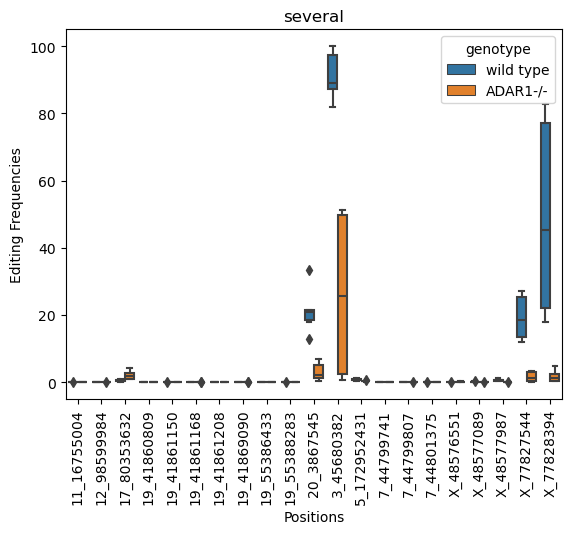

In [27]:
a2i.plot.boxplot(df[df_pv.columns])

In [28]:
df[df_pv.columns]

,11_16755004,12_98599984,17_80353632,19_41860809,19_41861150,19_41861168,19_41861208,19_41869090,19_55386433,19_55388283,...,7_44799741,7_44799807,7_44801375,X_48576551,X_48577089,X_48577987,X_77827544,X_77828394,region,genotype
SRR11050913,0.062189,0.070480,0.389105,0.016254,0.025435,0.009320,0.007100,0.010645,0.013020,0.008921,...,0.006664,0.016372,0.024168,0.028050,0.253749,0.738397,12.011173,17.819706,several,wild type
SRR11050914,0.157439,0.160691,0.727273,0.003260,0.040182,0.002378,0.008022,0.010954,0.014263,0.007256,...,0.011508,0.019628,0.024080,0.048204,0.157907,0.235571,13.829787,22.628952,several,wild type
SRR11050915,0.065552,0.119689,0.483092,0.007892,0.025138,0.009055,0.003325,0.003347,0.012704,0.045212,...,0.010304,0.019840,0.027331,0.125117,0.197287,0.366569,13.366337,22.045455,several,wild type
SRR11050916,0.170565,0.063880,2.880658,0.020088,0.022905,0.012311,0.037168,0.012764,0.004104,0.004663,...,0.031492,0.058121,0.006069,0.164594,0.115224,0.092251,0.196850,0.330579,several,ADAR1-/-
SRR11050917,0.097111,0.104972,4.184100,0.041251,0.015167,0.018688,0.016871,0.017506,0.007947,0.005981,...,0.026356,0.015888,0.005032,0.189358,0.042626,0.100604,0.215054,0.660793,several,ADAR1-/-
SRR11050918,0.178480,0.057099,2.283105,0.029841,0.028402,0.012147,0.035153,0.011629,0.004739,0.005251,...,0.027448,0.021425,0.010043,0.241935,0.150852,0.160735,0.212766,0.377358,several,ADAR1-/-
SRR11050919,0.029616,0.116709,0.197239,0.005129,0.029735,0.010100,0.007673,0.004610,0.011547,0.009811,...,0.020603,0.016912,0.020150,0.029184,0.195599,1.126712,27.272727,67.857143,several,wild type
SRR11050920,0.020947,0.109716,0.250000,0.006786,0.021375,0.012344,0.016717,0.009351,0.005485,0.010336,...,0.014914,0.020767,0.012193,0.031148,0.180465,0.778210,23.318386,82.648402,several,wild type
SRR11050921,0.069045,0.068766,1.028278,0.015202,0.029473,0.003000,0.019895,0.010532,0.008912,0.012492,...,0.007776,0.013895,0.024114,0.017413,0.203874,0.612156,25.925926,80.102041,several,wild type
SRR11050922,0.156047,0.023097,0.809717,0.007896,0.023684,0.011383,0.022247,0.006288,0.006049,0.003645,...,0.025441,0.026101,0.020568,0.116764,0.142012,0.066240,3.144654,2.583026,several,ADAR1-/-


In [682]:
sns.set(style="whitegrid")

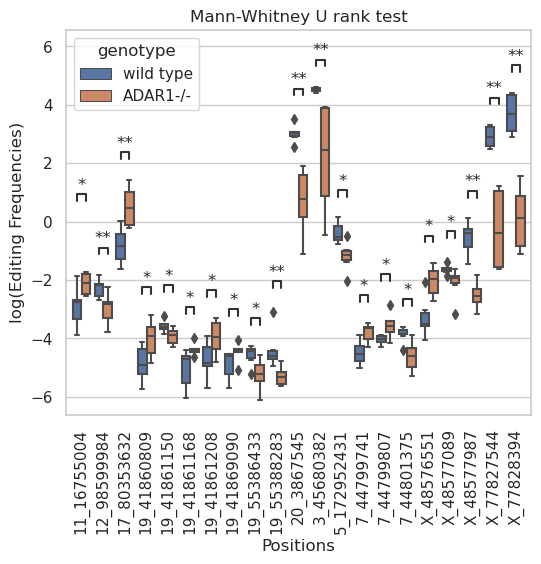

In [705]:
f, ax = plt.subplots(figsize=(6,5))
aux = df[df_pv.columns].drop(df[df_pv.columns].columns[-2], axis=1).melt(id_vars=df[df_pv.columns].columns[-1])
aux['value'] = np.log(aux.value)

x = 'variable'
y = 'value'
hue = df.columns[-1]

hue_order = aux[aux.columns[0]].unique()
order = aux.variable.unique()

ax = sns.boxplot(x=x, y=y, hue=hue, data=aux)
ax.set_xlabel('Positions')
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_ylabel('log(Editing Frequencies)')
ax.set_title('Mann-Whitney U rank test')

pairs = [tuple(itertools.product([p],hue_order)) for p in order]
annot = Annotator(ax, pairs=pairs, x=x, y=y, hue=hue, order=order,hue_order=hue_order, data=aux)
annot.configure(test=None, text_format='star', loc='inside', verbose=0)
annot.set_pvalues(df_pv[order].loc['p_value',:].values)
ax, test_results = annot.annotate()
# annot.set_pvalues(df_pv[order])

plt.savefig('/mnt/d/GoTx_Folder/draft/mannw_u.pdf', format='pdf', dpi=300,bbox_inches='tight')

In [43]:
df_pv[order].loc['p_value',:].values

array([0.025974025974025976, 0.008658008658008658, 0.008658008658008658,
       0.025974025974025976, 0.04112554112554113, 0.04112554112554113,
       0.04112554112554113, 0.025974025974025976, 0.025974025974025976,
       0.004329004329004329, 0.0021645021645021645, 0.004998124765082457,
       0.015151515151515152, 0.015151515151515152, 0.04112554112554113,
       0.015151515151515152, 0.015151515151515152, 0.025974025974025976,
       0.0021645021645021645, 0.0021645021645021645,
       0.0021645021645021645], dtype=object)

In [495]:
tuple(itertools.product(hue_order, [2]))

(('wild type', 2), ('ADAR1-/-', 2))

In [499]:
order

array(['11_16755004', '12_98599984', '17_80353632', '19_41860809',
       '19_41861150', '19_41861168', '19_41861208', '19_41869090',
       '19_55386433', '19_55388283', '20_3867545', '3_45680382',
       '5_172952431', '7_44799741', '7_44799807', '7_44801375',
       'X_48576551', 'X_48577089', 'X_48577987', 'X_77827544',
       'X_77828394'], dtype=object)

In [509]:
aux

,genotype,variable,value
0,wild type,11_16755004,-2.777576
1,wild type,11_16755004,-1.848717
2,wild type,11_16755004,-2.724907
3,ADAR1-/-,11_16755004,-1.768637
4,ADAR1-/-,11_16755004,-2.331901
...,...,...,...
247,wild type,X_77828394,4.414595
248,wild type,X_77828394,4.383301
249,ADAR1-/-,X_77828394,0.948962
250,ADAR1-/-,X_77828394,1.548813


In [503]:
pairs

[(('11_16755004', 'wild type'), ('11_16755004', 'ADAR1-/-')),
 (('12_98599984', 'wild type'), ('12_98599984', 'ADAR1-/-')),
 (('17_80353632', 'wild type'), ('17_80353632', 'ADAR1-/-')),
 (('19_41860809', 'wild type'), ('19_41860809', 'ADAR1-/-')),
 (('19_41861150', 'wild type'), ('19_41861150', 'ADAR1-/-')),
 (('19_41861168', 'wild type'), ('19_41861168', 'ADAR1-/-')),
 (('19_41861208', 'wild type'), ('19_41861208', 'ADAR1-/-')),
 (('19_41869090', 'wild type'), ('19_41869090', 'ADAR1-/-')),
 (('19_55386433', 'wild type'), ('19_55386433', 'ADAR1-/-')),
 (('19_55388283', 'wild type'), ('19_55388283', 'ADAR1-/-')),
 (('20_3867545', 'wild type'), ('20_3867545', 'ADAR1-/-')),
 (('3_45680382', 'wild type'), ('3_45680382', 'ADAR1-/-')),
 (('5_172952431', 'wild type'), ('5_172952431', 'ADAR1-/-')),
 (('7_44799741', 'wild type'), ('7_44799741', 'ADAR1-/-')),
 (('7_44799807', 'wild type'), ('7_44799807', 'ADAR1-/-')),
 (('7_44801375', 'wild type'), ('7_44801375', 'ADAR1-/-')),
 (('X_48576551', '

In [48]:
df_a = df_a[df.columns]
df_g = df_g[df.columns]

In [49]:
time1 = time.time()
# a, g = a2i.filter.pool_positions(df_a.fillna(0.01),df_g.fillna(0.01))
a, g = a2i.filter.pool_positions(df_a,df_g)

time2 = time.time() - time1
print(time2,'s, ',time2/60,'min')

3.22821307182312 s,  0.053803551197052005 min


In [369]:
# a, g = a2i.filter.pool_positions(df_a.fillna(0.01),df_g.fillna(0.01))

In [50]:
chi = a2i.stats.chi2_test(a,g,only_pvalue=True,pvalue_filter_limit=.05)
chi

,11_16755004,12_98599984,15_44561843,19_41860835,19_41860843,19_41861150,19_41869033,19_41869717,19_55386571,19_55386578,...,5_172952431,7_44799741,7_44799807,7_44801292,7_44801505,X_48576328,X_48576551,X_48577089,region,genotype
pvalue,0.024408,0.004265,0.037467,0.037716,0.048953,0.030356,0.008368,0.041716,0.04406,0.030622,...,0.019568,0.013371,0.006147,0.025404,0.031881,0.030934,0.000043,0.037573,several,ADAR1-/-_vs_wild type


In [53]:
chi[order].loc['pvalue',:].values

array([2.44075506e-02, 4.26469123e-03, 3.74671075e-02, 3.77157734e-02,
       4.89533108e-02, 3.03558306e-02, 8.36777724e-03, 4.17161176e-02,
       4.40600875e-02, 3.06218317e-02, 1.22767938e-02, 3.79877440e-02,
       2.16331605e-03, 4.74842051e-02, 1.87274302e-02, 5.20651313e-03,
       1.95681263e-02, 1.33713831e-02, 6.14674106e-03, 2.54038180e-02,
       3.18812047e-02, 3.09340760e-02, 4.27051518e-05, 3.75732871e-02])

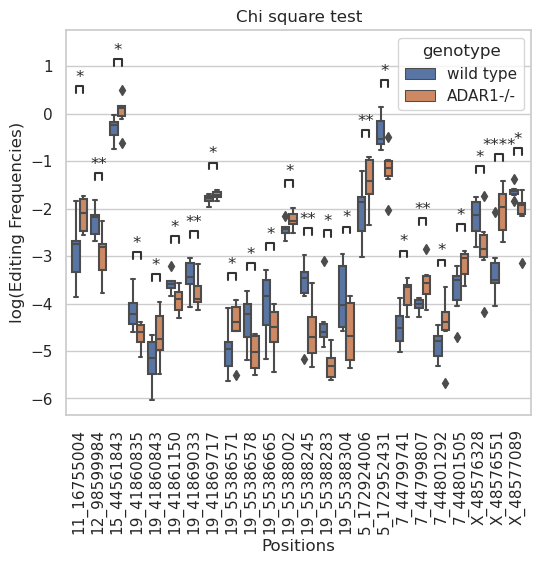

In [706]:
f, ax = plt.subplots(figsize=(6,5))
aux = df[chi.columns].drop(df[chi.columns].columns[-2], axis=1).melt(id_vars=df[chi.columns].columns[-1])
aux['value'] = np.log(aux.value)

x = 'variable'
y = 'value'
hue = df.columns[-1]

hue_order = aux[aux.columns[0]].unique()
order = aux.variable.unique()

ax = sns.boxplot(x=x, y=y, hue=hue, data=aux)
ax.set_xlabel('Positions')
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_ylabel('log(Editing Frequencies)')
ax.set_title('Chi square test')

pairs = [tuple(itertools.product([p],hue_order)) for p in order]
annot = Annotator(ax, pairs=pairs, x=x, y=y, hue=hue, order=order,hue_order=hue_order, data=aux)
annot.configure(test=None, text_format='star', loc='inside', verbose=0)
annot.set_pvalues(chi[order].loc['pvalue',:].values)
ax, test_results = annot.annotate()

# plt.savefig('/mnt/d/GoTx_Folder/draft/chi2.pdf', format='pdf', dpi=300,bbox_inches='tight')

In [57]:
def fisher_test(df_a, df_g, only_pvalue=True, return_only_significant=True, pvalue_filter_limit=0.05):
    aux_pv = []
    for c in df_a.columns[:-2]:
        if only_pvalue:
            aux_pv.append(fisher_exact([df_a[c].values, df_g[c].values], alternative='two-sided').pvalue)
        else:
            aux_pv.append(fisher_exact([df_a[c].values, df_g[c].values], alternative='two-sided'))

    if only_pvalue:
        fisher_res = pd.DataFrame(aux_pv, index=df_a.columns[:-2], columns=['pvalue'])
    else:
        fisher_res = pd.DataFrame(aux_pv, index=df_a.columns[:-2], columns=['statistic','pvalue'])

    if return_only_significant:
        fisher_res = fisher_res[fisher_res.pvalue<=pvalue_filter_limit].T
    else:
        fisher_res = fisher_res.T

    fisher_res[df_a.columns[-2]] = df_a.iloc[0,-2]
    fisher_res[df_a.columns[-1]] = '_vs_'.join(df_a.iloc[:,-1].unique())

    return fisher_res


In [58]:
fis = fisher_test(a,g,only_pvalue=True,return_only_significant=False,pvalue_filter_limit=.05)
fis

,11_16744616,11_16748108,11_16752815,11_16752839,11_16752876,11_16755004,12_132769626,12_64421327,12_64439300,12_98597857,...,X_48576328,X_48576551,X_48576569,X_48577089,X_48577487,X_48577626,X_48577946,X_48578090,region,genotype
pvalue,0.444844,0.742769,0.896941,0.199999,0.519128,0.018106,1.0,0.670001,0.152222,0.337001,...,0.029863,0.000035,0.814907,0.031661,0.050668,0.085161,0.742406,0.083754,several,ADAR1-/-_vs_wild type


In [60]:
or_ = a2i.stats.odds_r(a[fis.columns],g[fis.columns])
or_

,11_16744616,11_16748108,11_16752815,11_16752839,11_16752876,11_16755004,12_132769626,12_64421327,12_64439300,12_98597857,...,X_48576328,X_48576551,X_48576569,X_48577089,X_48577487,X_48577626,X_48577946,X_48578090,region,genotype
odds_ratio,1.278264,1.080535,1.044661,0.745263,1.25955,0.484766,1.029147,1.112103,1.543688,0.800981,...,1.878152,0.290008,1.044498,1.559334,1.630231,1.587615,0.853261,0.808962,several,ADAR1-/-_vs_wild type


In [403]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [712]:
def manhattanplot(df_or, df_pv, p_value_line:float = None, chr_order:list = [], ax=None, figsize:tuple = None):
    aux_m = pd.concat([df_or,df_pv]).iloc[:,:-2].T.reset_index()    
    aux_m['-log10(pvalue)'] = -np.log10(aux_m['pvalue'])
    aux_m['index'] = aux_m['index'].astype(str)
    aux_m['chr'] = aux_m['index'].str.split('_').str[0]
    if ax == None:
        if figsize == None:
            f, ax = plt.subplots()
        else:
            f, ax = plt.subplots(figsize=figsize)
    
    x = 'chr'
    y = '-log10(pvalue)'
    hue = 'odds_ratio'
    order = None
    if chr_order:
        order = chr_order

    sns.stripplot(x=x, y=y, hue=hue, order=order, palette='viridis_r', jitter=.5, size=7.5, data=aux_m, ax=ax)
    ax.get_legend().remove()
    ax.set_xlabel('Chromosomes')
    ax.set_ylabel('-log10(pvalue)')
    ax.set_title(','.join(df_or.iloc[:,-1].unique()))
    if p_value_line:
        ax.axhline(-np.log10(p_value_line), ls='--', lw=.5, color='black')

    cmap = mpl.cm.viridis_r
    norm = mpl.colors.Normalize(vmin=aux_m.odds_ratio.min(), vmax=aux_m.odds_ratio.max())

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size=.15, pad=.01)
    cbar = plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, label='Odds ratio', cax=cax)
    cbar.outline.set_color(None)

    return ax

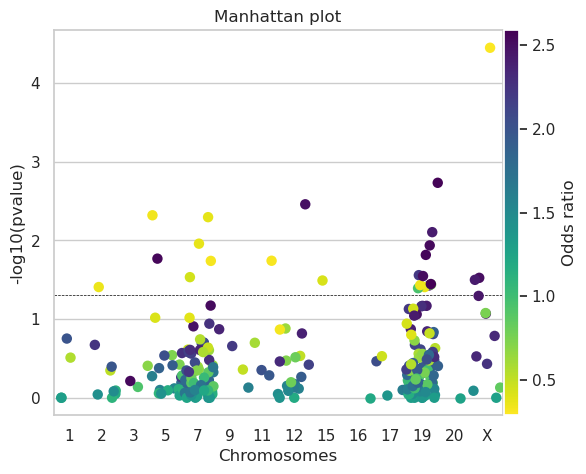

In [713]:
ax = manhattanplot(or_, fis, p_value_line=0.05, chr_order=['1', '2', '3', '5', '7', '9', '11', '12', '15', '16', '17', '19', '20','X'],figsize=(6,5))
ax.set_title('Manhattan plot')
plt.savefig('/mnt/d/GoTx_Folder/draft/manhatplot2.pdf', format='pdf', dpi=300,bbox_inches='tight')

In [470]:
[str(ps) for ps in list({int(p.split('_')[0]) for p in or_.columns[:-2] if not 'X' in p})]

['1', '2', '3', '5', '7', '9', '11', '12', '15', '16', '17', '19', '20']

In [355]:
aux_m = pd.concat([or_,fis]).iloc[:,:-2].T.reset_index()
    aux_m = pd.concat([df_or,df_pv]).iloc[:,:-2].T.reset_index()    
    aux_m['-log10(pvalue)'] = -np.log10(aux_m['pvalue'])
    aux_m['chr'] = aux_m['index'].str.split('_').str[0]
    if ax == None:
        if figsize == None:
            f, ax = plt.subplots()
        else:
            f, ax = plt.subplots(figsize=figsize)

    aux_m['index'] = aux_m['index'].astype(str)
    x = 'chr'
    y = '-log10(pvalue)'
    hue = 'odds_ratio'

    sns.stripplot(x=x, y=y, hue=hue, palette='viridis_r', data=aux_m, ax=ax)
    ax.get_legend().remove()
    ax.set_xlabel('Positions')
    ax.set_xticks([])
    # ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_ylabel('-log10(pvalue)')
    ax.set_title(','.join(df_or.iloc[:,-1].unique()))
    if p_value_line:
        ax.axhline(-np.log10(p_value_line), ls='--', lw=.5, color='black')

    cmap = mpl.cm.viridis_r
    norm = mpl.colors.Normalize(vmin=aux_m.odds_ratio.min(), vmax=aux_m.odds_ratio.max())
    
    cbar = plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, label='Odds ratio')
    cbar.outline.set_color(None)

,index,odds_ratio,pvalue,chr
0,11_16744616,1.278264,0.444844,11
1,11_16748108,1.080535,0.742769,11
2,11_16752815,1.044661,0.896941,11
3,11_16752839,0.745263,0.199999,11
4,11_16752876,1.259550,0.519128,11
...,...,...,...,...
231,X_48577089,1.559334,0.031661,X
232,X_48577487,1.630231,0.050668,X
233,X_48577626,1.587615,0.085161,X
234,X_48577946,0.853261,0.742406,X


In [381]:
aux_m.odds_ratio.min()

0.29000832333333776

In [382]:
import matplotlib as mpl

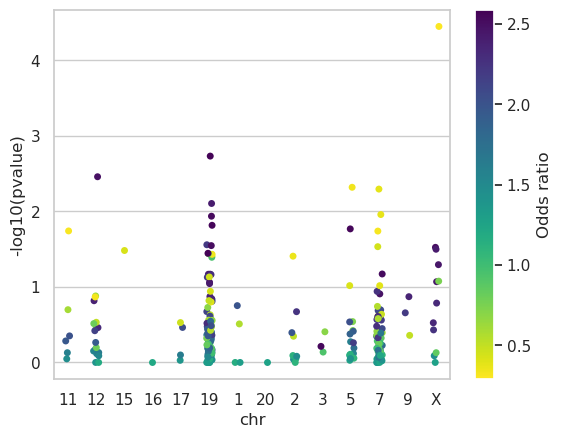

In [390]:
cmap = mpl.cm.viridis_r
norm = mpl.colors.Normalize(vmin=aux_m.odds_ratio.min(), vmax=aux_m.odds_ratio.max())

aux_m['-log10(pvalue)'] = -np.log10(aux_m['pvalue'])
aux_m['index'] = aux_m['index'].astype(str)
x = 'chr'
y = '-log10(pvalue)'
hue = 'odds_ratio'

ax = sns.stripplot(x=x, y=y, hue=hue, palette='viridis_r',data=aux_m)
ax.get_legend().remove()
cbar = plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, label='Odds ratio')
cbar.outline.set_color(None)
# cbar.minorticks_on()
plt.show()

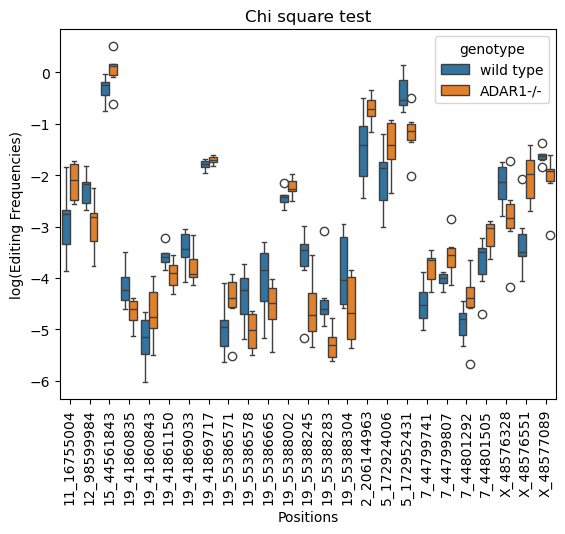

In [381]:
aux = df[fis.columns].drop(df[fis.columns].columns[-2], axis=1).melt(id_vars=df[fis.columns].columns[-1])
aux['value'] = np.log(aux.value)

x = 'variable'
y = 'value'
hue = df.columns[-1]

ax = sns.boxplot(x=x, y=y, hue=hue, data=aux)
ax.set_xlabel('Positions')
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_ylabel('log(Editing Frequencies)')
ax.set_title('Chi square test')
plt.savefig('/mnt/d/GoTx_Folder/draft/chi2.pdf', format='pdf', dpi=300,bbox_inches='tight')

In [184]:
from scipy.stats import chi2_contingency, fisher_exact, f_oneway, tukey_hsd, kruskal, mannwhitneyu, ttest_ind, entropy

In [ ]:
entropy([])

In [95]:
df

,11_16744616,11_16744620,11_16744631,11_16744632,11_16744675,11_16748108,11_16748111,11_16748122,11_16748149,11_16752815,...,X_77828545,X_77828723,X_77828981,X_77856805,X_77857415,X_77875460,X_77826960,X_77828141,region,genotype
SRR11050913,0.142399,0.037147,0.032841,0.064267,0.379507,0.237741,0.157580,0.056867,0.080150,0.105152,...,0.767263,0.815661,0.534759,0.760456,0.168067,0.564972,NaN,NaN,several,wild type
SRR11050914,0.175850,0.030950,0.027902,0.054585,0.207523,0.240038,0.228542,NaN,NaN,0.138281,...,1.250000,NaN,0.628931,1.890034,0.270636,0.486027,0.414938,0.896057,several,wild type
SRR11050915,0.033311,0.104493,0.062696,0.030960,0.352338,0.271493,0.324254,0.029011,NaN,0.028090,...,0.210970,NaN,0.465116,1.214575,0.949367,0.154321,0.599700,0.218341,several,wild type
SRR11050916,0.058309,NaN,0.053576,0.052673,0.425000,0.140056,0.098256,NaN,NaN,0.171380,...,NaN,0.548246,0.208333,1.144492,0.352526,0.110254,0.527426,0.320000,several,ADAR1-/-
SRR11050917,0.087642,NaN,0.025974,NaN,0.405922,0.313269,0.256949,0.041580,0.020149,0.121065,...,NaN,0.232019,1.399491,0.274348,0.722892,0.225225,0.092678,0.339559,several,ADAR1-/-
SRR11050918,0.061920,0.032175,0.028114,NaN,0.501379,0.162262,0.247341,0.066372,0.021286,0.170648,...,NaN,0.623053,0.923788,0.928382,0.814901,0.222717,0.214133,0.182815,several,ADAR1-/-
SRR11050919,0.127470,0.048457,0.104337,0.058858,0.284136,0.154655,0.016611,0.030148,0.014529,0.107444,...,11.111111,0.796813,1.388889,NaN,NaN,0.166667,0.492611,NaN,several,wild type
SRR11050920,0.085161,0.022134,0.102145,0.060289,0.193966,0.041434,0.088909,0.039308,0.037230,0.128488,...,12.857143,0.440529,2.083333,NaN,0.446429,0.202429,NaN,0.400000,several,wild type
SRR11050921,0.045086,0.069573,0.064921,0.042735,0.046555,0.133067,0.023557,0.043169,0.020231,0.121729,...,13.106796,0.450450,NaN,NaN,0.257069,NaN,1.315789,NaN,several,wild type
SRR11050922,0.053807,0.111235,NaN,0.078616,0.320793,0.084986,0.149076,0.080150,0.025132,0.073892,...,0.403226,NaN,NaN,0.526316,NaN,NaN,0.401606,NaN,several,ADAR1-/-


In [83]:
from scipy import stats

In [90]:
1-stats.chi2.cdf(10.49 , 3)

0.014828886567000876

In [79]:
df_a['11_16738709']

SRR11050913     916.0
SRR11050914       NaN
SRR11050915       NaN
SRR11050916    1171.0
SRR11050917       NaN
SRR11050918       NaN
Name: 11_16738709, dtype: float64

In [58]:
a = df_a.fillna(0).loc[df_a.iloc[:,-1]=='ADAR1-/-', df_a.columns[:-2] ].values
g = df_g.fillna(0).loc[df_g.iloc[:,-1]=='ADAR1-/-', df_a.columns[:-2] ].values

array([[1., 2., 4., ..., 0., 0., 0.],
       [0., 2., 0., ..., 4., 1., 2.],
       [0., 0., 0., ..., 1., 1., 2.]])

In [61]:
chi2_contingency(np.array([a,g]))

ValueError: The internally computed table of expected frequencies has a zero element at (0, 0, 8).

In [107]:
a[a.columns[-1]].unique()

array(['ADAR1-/-', 'wild type'], dtype=object)

## Entropy

In [218]:
def entropy_calculation(df_a, df_g):
    a = df_a.copy()
    g = df_g.copy()
    condition_name = a.columns[-1]
    conditions = a[condition_name].unique()
    cols = a.columns[:-2]
    a['base_aux'] = 'a'
    g['base_aux'] = 'g'

    aux = pd.concat([a, g])
    del(a)
    del(g)
    aux_dict = {cond:[] for cond in conditions}
    
    for cond in conditions:
        for col in aux.columns[:-3]:
            aux_dict[cond].append(entropy(aux[(aux[condition_name]==cond)][col].values/aux[(aux[condition_name]==cond)][col].values.sum()))
    aux = pd.DataFrame(aux_dict).T
    aux.columns = cols
    return aux

In [231]:
entr = entropy_calculation(a,g)
entr

,11_16744616,11_16748108,11_16752815,11_16752839,11_16752876,11_16755004,12_132769626,12_64421327,12_64439300,12_98597857,...,X_48575266,X_48575279,X_48576328,X_48576551,X_48576569,X_48577089,X_48577487,X_48577626,X_48577946,X_48578090
ADAR1-/-,0.006463,0.011661,0.008168,0.013041,0.005635,0.009746,0.012618,0.048648,0.027498,0.008172,...,0.002930,0.009293,0.005380,0.010476,0.016246,0.009730,0.009970,0.019133,0.006441,0.035329
wild type,0.008010,0.012467,0.008485,0.010113,0.006899,0.005174,0.012309,0.053061,0.039512,0.006731,...,0.004042,0.009190,0.009337,0.003537,0.016863,0.014284,0.015202,0.028294,0.005603,0.029594


In [453]:
def entropy_plot(entr, n_top:int = 50, log_scale:bool = False, ax=None, figsize:tuple = None ):
    aux = entr.melt(ignore_index=False).reset_index()
    aux = aux[ aux.variable.isin(aux[aux['index']==aux['index'].unique()[0]].sort_values('value', ascending=False).variable.values[:n_top]) ]
    order = aux[aux['index']==aux['index'].unique()[0]].sort_values('value', ascending=False).variable.values

    if log_scale:
        aux['value'] = np.log(aux.value)
    if ax == None:
        if figsize == None:
            f, ax = plt.subplots()
        else:
            f, ax = plt.subplots(figsize=figsize)

    x = 'variable'
    y = 'value'
    hue = 'index'

    sns.barplot(x='variable', y='value', hue='index',order=order, data=aux, ax=ax)
    ax.set_xlabel('Positions')
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    if log_scale:
        ax.set_ylabel('log(Editing Frequencies)')
    else:
        ax.set_ylabel('Entropy')
    ax.set_title('Entropy')

    return ax

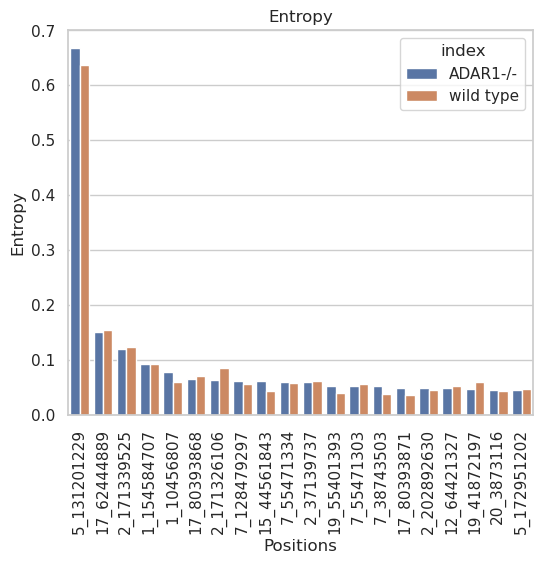

In [703]:
ax = entropy_plot(entr, n_top=20, figsize=(6,5))
plt.savefig('/mnt/d/GoTx_Folder/draft/entropy.pdf', format='pdf', dpi=300,bbox_inches='tight')

In [317]:
data=entr.melt(ignore_index=False).reset_index()
data = data[ data.variable.isin(data[data['index']==data['index'].unique()[0]].sort_values('value', ascending=False).variable.values[:50]) ]
order = data[data['index']==data['index'].unique()[0]].sort_values('value', ascending=False).variable.values

<Axes: xlabel='variable', ylabel='value'>

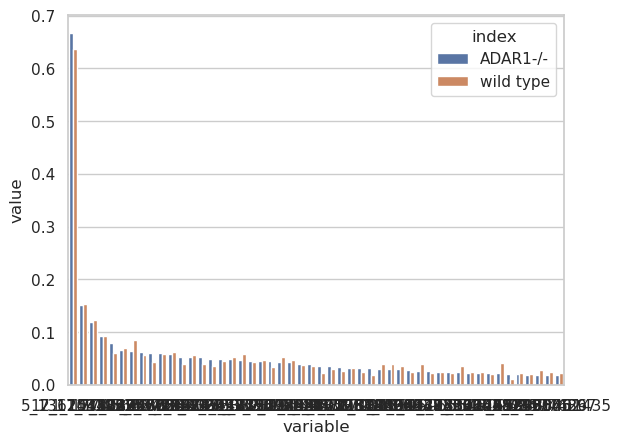

In [319]:
sns.barplot(x='variable', y='value', hue='index',order=order, data=data)

## Pearson freq

In [535]:
from scipy.stats import pearsonr
from scipy.spatial.distance import squareform

In [488]:
df[df_pv.columns[:-2].to_list()+df_pv.columns[-1].to_list()]#.groupby('').corr()

AttributeError: 'str' object has no attribute 'to_list'

In [569]:
aux = df[df_pv.columns]
condition_name = aux.columns[-1]
conditions = aux[condition_name].unique()
P_list = []
pv_list = []
cols_list = []
for col in aux.columns[:-2]:
    P_list.append(pearsonr(aux[aux[condition_name]==conditions[0]][col], aux[aux[condition_name]==conditions[1]][col]).statistic)
    pv_list.append(pearsonr(aux[aux[condition_name]==conditions[0]][col], aux[aux[condition_name]==conditions[1]][col]).pvalue)
aux = pd.DataFrame([P_list,pv_list], columns=aux.columns[:-2], index=['R','pvalue']).T.reset_index()

In [684]:
def conditon_pearson(df, return_only_significant = True, pvalue_filter_limit = 0.05):
    aux = df.copy()

    condition_name = aux.columns[-1]
    conditions = aux[condition_name].unique()
    P_list = []
    pv_list = []

    for col in aux.columns[:-2]:
        P_list.append(pearsonr(aux[aux[condition_name]==conditions[0]][col], aux[aux[condition_name]==conditions[1]][col]).statistic)
        pv_list.append(pearsonr(aux[aux[condition_name]==conditions[0]][col], aux[aux[condition_name]==conditions[1]][col]).pvalue)
    aux = pd.DataFrame([P_list,pv_list], columns=aux.columns[:-2], index=['R','pvalue']).T.reset_index()

    if return_only_significant:
        aux = aux[aux.pvalue <= pvalue_filter_limit]

    aux.columns = ['Positions', 'R', 'pvalue']
    return aux

In [697]:
aux = conditon_pearson(df[df_pv.columns], return_only_significant=False ,pvalue_filter_limit=0.3)

[]

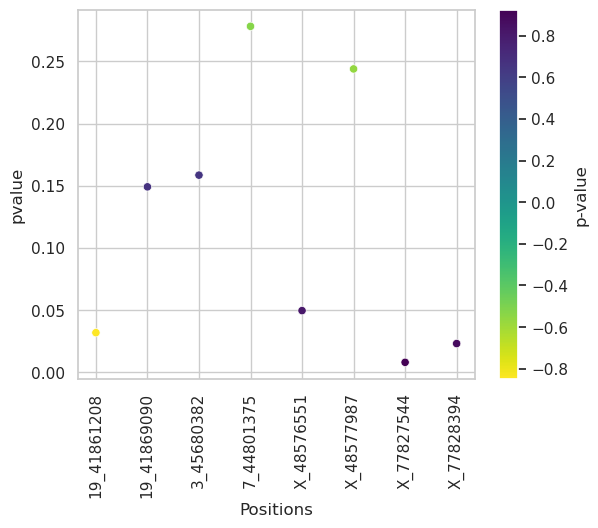

In [602]:
ax = sns.scatterplot(x='Positions', hue='R', y='pvalue', palette='viridis_r', data=aux)
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.get_legend().remove()

cmap = mpl.cm.viridis_r
norm = mpl.colors.Normalize(vmin=aux.R.min(), vmax=aux.R.max())
cbar = plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, label='p-value')
cbar.outline.set_color(None)
ax.plot()

In [686]:
def corr_pearson_plot(p_corr, log_scale:bool = False,  p_value_line:float = None, ax = None, figsize:tuple = None):
    aux = p_corr.copy()
    x = 'Positions'
    y = 'pvalue'
    hue = 'R'
    if log_scale:
        aux['-log10(pvalue)'] = -np.log10(aux.pvalue)
        y = '-log10(pvalue)'
    if ax == None:
        if figsize == None:
            f, ax = plt.subplots()
        else:
            f, ax = plt.subplots(figsize=figsize)

    sns.scatterplot(x=x, y=y, hue=hue, data=aux, ax=ax)
    ax.get_legend().remove()
    ax.set_xlabel('Positions')
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    if log_scale:
        ax.set_ylabel('-log10(pvalue)')
        if p_value_line != None:
            ax.axhline(-np.log10(p_value_line), ls='--', lw=.5, color='black')
    else:
        ax.set_ylabel('pvalue')
        if p_value_line != None:
            ax.axhline(p_value_line, ls='--', lw=.5, color='black')
    ax.set_title(','.join(df.iloc[:,-2].unique()))

    cmap = mpl.cm.viridis_r
    norm = mpl.colors.Normalize(vmin=aux.R.min(), vmax=aux.R.max())
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size=.15, pad=.01)
    cbar = plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, label='R', cax=cax)
    cbar.outline.set_color(None)

    return ax

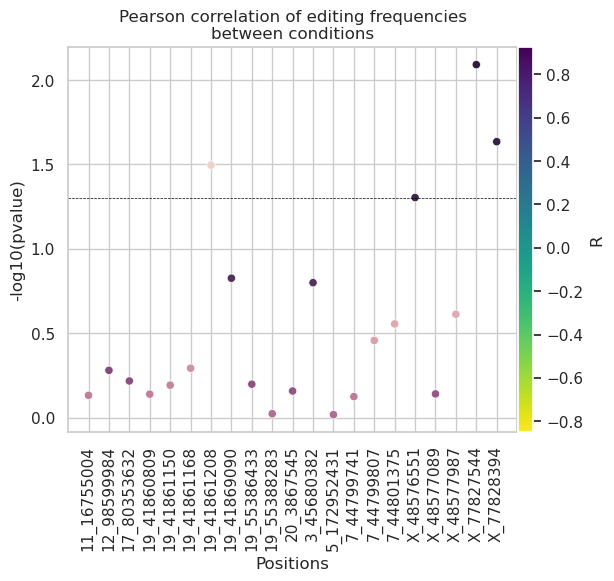

In [700]:
ax = corr_pearson_plot(aux, log_scale=True, p_value_line=0.05, figsize=(6,5))
ax.set_title('Pearson correlation of editing frequencies\nbetween conditions')
plt.savefig('/mnt/d/GoTx_Folder/draft/editing_corr.pdf', format='pdf', dpi=300,bbox_inches='tight')

<Axes: title={'center': 'several'}, xlabel='Positions', ylabel='pvalue'>

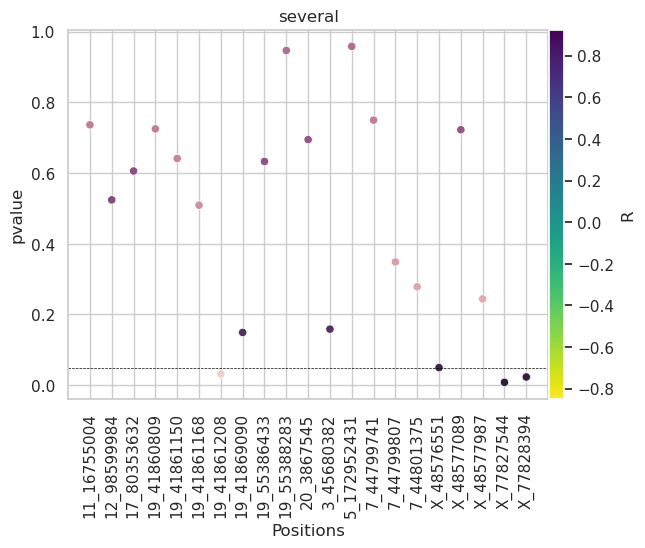

In [688]:
corr_pearson_plot(aux, log_scale=False, p_value_line=0.05)

## Gene Corr

In [621]:
import os

In [636]:
path = '/mnt/e/editing_methods/PRJNA605715_GSE145011/trimmed_salmon_quant/'
tpm_aux = []
for srr in os.listdir(path):
    tpm_aux.append(pd.read_csv(path+srr+'/quant.sf', sep='\t')[['Name','TPM']])
    tpm_aux[-1]['Run'] = srr
tpm = pd.concat(tpm_aux)

In [643]:
exprs = tpm[tpm.Name.str.contains('ENST00000368474')]
exprs.TPM.values

array([ 3.252617,  4.299662,  4.713678,  0.      ,  0.      ,  0.      ,
       39.336771, 41.647236, 25.591093, 16.625418, 20.444033, 20.640526])

In [640]:
df[df_pv.columns]

,11_16755004,12_98599984,17_80353632,19_41860809,19_41861150,19_41861168,19_41861208,19_41869090,19_55386433,19_55388283,...,7_44799741,7_44799807,7_44801375,X_48576551,X_48577089,X_48577987,X_77827544,X_77828394,region,genotype
SRR11050913,0.062189,0.070480,0.389105,0.016254,0.025435,0.009320,0.007100,0.010645,0.013020,0.008921,...,0.006664,0.016372,0.024168,0.028050,0.253749,0.738397,12.011173,17.819706,several,wild type
SRR11050914,0.157439,0.160691,0.727273,0.003260,0.040182,0.002378,0.008022,0.010954,0.014263,0.007256,...,0.011508,0.019628,0.024080,0.048204,0.157907,0.235571,13.829787,22.628952,several,wild type
SRR11050915,0.065552,0.119689,0.483092,0.007892,0.025138,0.009055,0.003325,0.003347,0.012704,0.045212,...,0.010304,0.019840,0.027331,0.125117,0.197287,0.366569,13.366337,22.045455,several,wild type
SRR11050916,0.170565,0.063880,2.880658,0.020088,0.022905,0.012311,0.037168,0.012764,0.004104,0.004663,...,0.031492,0.058121,0.006069,0.164594,0.115224,0.092251,0.196850,0.330579,several,ADAR1-/-
SRR11050917,0.097111,0.104972,4.184100,0.041251,0.015167,0.018688,0.016871,0.017506,0.007947,0.005981,...,0.026356,0.015888,0.005032,0.189358,0.042626,0.100604,0.215054,0.660793,several,ADAR1-/-
SRR11050918,0.178480,0.057099,2.283105,0.029841,0.028402,0.012147,0.035153,0.011629,0.004739,0.005251,...,0.027448,0.021425,0.010043,0.241935,0.150852,0.160735,0.212766,0.377358,several,ADAR1-/-
SRR11050919,0.029616,0.116709,0.197239,0.005129,0.029735,0.010100,0.007673,0.004610,0.011547,0.009811,...,0.020603,0.016912,0.020150,0.029184,0.195599,1.126712,27.272727,67.857143,several,wild type
SRR11050920,0.020947,0.109716,0.250000,0.006786,0.021375,0.012344,0.016717,0.009351,0.005485,0.010336,...,0.014914,0.020767,0.012193,0.031148,0.180465,0.778210,23.318386,82.648402,several,wild type
SRR11050921,0.069045,0.068766,1.028278,0.015202,0.029473,0.003000,0.019895,0.010532,0.008912,0.012492,...,0.007776,0.013895,0.024114,0.017413,0.203874,0.612156,25.925926,80.102041,several,wild type
SRR11050922,0.156047,0.023097,0.809717,0.007896,0.023684,0.011383,0.022247,0.006288,0.006049,0.003645,...,0.025441,0.026101,0.020568,0.116764,0.142012,0.066240,3.144654,2.583026,several,ADAR1-/-


In [669]:
def gene_pearson_corr(df, exprs:list, return_only_significant:bool = True, pvalue_filter_limit:float = 0.05):
    aux = df.copy()

    P_list = []
    pv_list = []

    for col in aux.columns[:-2]:
        P_list.append(pearsonr(aux[col].values, exprs).statistic)
        pv_list.append(pearsonr(aux[col].values, exprs).pvalue)
    aux = pd.DataFrame([P_list,pv_list], columns=aux.columns[:-2], index=['R','pvalue']).T.reset_index()

    if return_only_significant:
        aux = aux[aux.pvalue <= pvalue_filter_limit]
    aux.columns = ['Positions', 'R', 'pvalue']
    return aux

In [701]:
aux = gene_pearson_corr(df[df_pv.columns], exprs.TPM.values,return_only_significant=False)
aux

,Positions,R,pvalue
0,11_16755004,-0.691477,0.012744
1,12_98599984,0.028309,0.930407
2,17_80353632,-0.583499,0.046407
3,19_41860809,-0.523485,0.080694
4,19_41861150,-0.067442,0.835032
5,19_41861168,-0.124008,0.700996
6,19_41861208,-0.272140,0.392158
7,19_41869090,-0.383148,0.218929
8,19_55386433,-0.086088,0.790223
9,19_55388283,-0.069710,0.829556


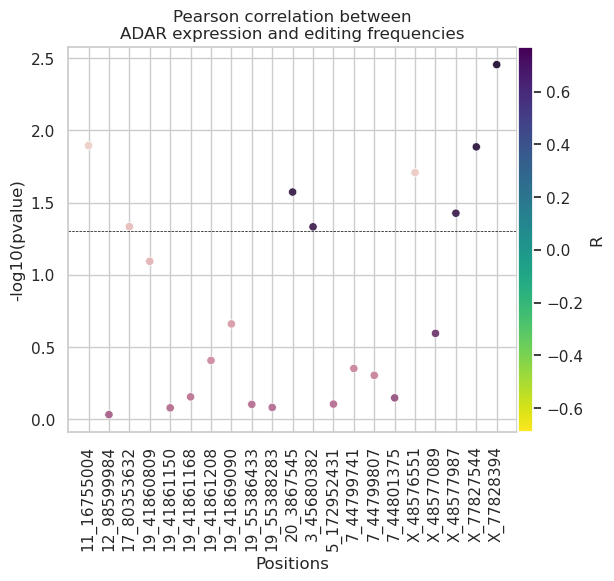

In [702]:
ax = corr_pearson_plot(aux, log_scale=True, p_value_line=0.05, figsize=(6,5))
ax.set_title('Pearson correlation between\nADAR expression and editing frequencies')
plt.savefig('/mnt/d/GoTx_Folder/draft/adar_corr.pdf', format='pdf', dpi=300,bbox_inches='tight')

In [657]:
P_list = []
pv_list = []

for col in aux.columns[:-2]:
    P_list.append(pearsonr(aux[col].values, list).statistic)
    pv_list.append(pearsonr(aux[col].values, list).pvalue)

TypeError: object of type 'type' has no len()

In [658]:
col

'11_16755004'

In [660]:
aux[col].values

array([0.06218905, 0.15743899, 0.06555228, 0.1705653 , 0.09711095,
       0.17848037, 0.02961647, 0.0209468 , 0.06904488, 0.15604681,
       0.08006405, 0.07761966])